$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Prod}{\prod\limits}$
$\newcommand{\Max}{\max\limits}$
$\newcommand{\Min}{\min\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\Exp}{\mathbb{E}}$
$\newcommand{\Var}{\mathbb{V}}$
$\newcommand{\Energy}{\mathcal{E}}$
$\newcommand{\Prob}{\mathcal{P}}$
$\newcommand{\N}{\mathcal{N}}$


$\newcommand{\LogLike}{\mathcal{L}}$
$\newcommand{\Like}{\ell}$

$\newcommand{\bolda}{\boldsymbol{a}}$
$\newcommand{\boldA}{\boldsymbol{A}}$
$\newcommand{\ba}{\bolda}$
$\newcommand{\bA}{\boldA}$

$\newcommand{\boldb}{\boldsymbol{b}}$
$\newcommand{\boldB}{\boldsymbol{B}}$
$\newcommand{\bb}{\boldb}$
$\newcommand{\bB}{\boldB}$

$\newcommand{\boldd}{\boldsymbol{d}}$
$\newcommand{\boldD}{\boldsymbol{D}}$
$\newcommand{\bd}{\boldd}$
$\newcommand{\bD}{\boldD}$

$\newcommand{\boldf}{\boldsymbol{f}}$
$\newcommand{\boldF}{\boldsymbol{F}}$
$\newcommand{\bf}{\boldf}$
$\newcommand{\bF}{\boldF}$

$\newcommand{\boldt}{\boldsymbol{t}}$
$\newcommand{\boldT}{\boldsymbol{T}}$
$\newcommand{\bt}{\boldsymbol{\boldt}}$
$\newcommand{\bT}{\boldsymbol{\boldT}}$

$\newcommand{\boldx}{\boldsymbol{x}}$
$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\bx}{\boldx}$
$\newcommand{\bX}{\boldX}$

$\newcommand{\boldY}{\boldsymbol{Y}}$
$\newcommand{\boldy}{\boldsymbol{y}}$
$\newcommand{\bY}{\boldY}$
$\newcommand{\by}{\boldy}$

$\newcommand{\boldZ}{\boldsymbol{Z}}$
$\newcommand{\boldz}{\boldsymbol{z}}$
$\newcommand{\bZ}{\boldZ}$
$\newcommand{\bz}{\boldz}$

$\newcommand{\boldTheta}{\boldsymbol{\Theta}}$
$\newcommand{\boldtheta}{\boldsymbol{\theta}}$
$\newcommand{\bTheta}{\boldTheta}$
$\newcommand{\btheta}{\boldtheta}$

<a id='toc'></a>
# Содержание (Table of Contents)
* [Смесь нормальных распределений](#ml_gm)
   * [Примеры использования](#ml_gm_my_examples)
        * [GaussianMixtureD1](#ml_gm_my_examples_1d)
        * [GaussianMixtureD2](#ml_gm_my_examples_2d)
        * [GaussianMixture](#ml_gm_my_examples_nd)
    * [ContourPlotter2D](#ml_gm_plotter)
    * [Из sklearn](#ml_gm_sklearn)
* [K-Means](#ml_kmeans)
    * [Теоретическое обоснование](#ml_kmeans_theory)
    * [Реализация K-Means кластеризации](#ml_kmeans_impl)
    * [Задача 1. Метрики кластеризации](#ml_kmeans_task1)
    * [Задача 2. Асимптотики при K-Means кластеризации](#ml_kmeans_task2)
        * [Задача 2.1](#ml_kmeans_task21)
        * [Задача 2.2. Нахождение областей в случае $K=5$](#ml_kmeans_task22)
        * [Задача 2.3. Области в случае нормального распределения](#ml_kmeans_task23)
* [Expectation-Maximization](#em_algorithm)
    * [Теоретическое обоснование](#em_algorithm_theory)
    * [EM-алгоритма для смеси нормальных с.в.](#em_algorithm_impl_norm)
        * [Одномерное нормальное распределение](#em_algorithm_example_1)
        * [Двумерное ($N$-мерное) нормальное распределение](#em_algorithm_example_2)
    * [EM-алгоритма для смеси бернуллиевских с.в.](#em_algo_bern)
        * [Теория](#em_algo_bern_theory)
        * [Реализация](#em_algo_bern_impl)
        * [Применение](#em_algo_bern_usage)
* [Тематическое моделирование](#em_topic_modelling)
    * [3.1 Рассуждения на тему тематического моделирования](#discussion_on_topic_modeling)
    * [3.2 Реализация ЕМ-алгоритма для модели PLSA и его применение](#plsa_and_application)
        * [3.2.1 Задание 1 [3 балла]](#plsa_task1)
        * [3.2.2 Задание 2 [0.5 балла]](#plsa_task2)
        * [3.2.3 Задание 3 [0.5 балла]](#plsa_task3)
    * [3.3 Модель LDA и визуализация](#lda_and_visualization)
        * [3.3.1 Задание 1 [1 балла]](#lda_task1)
        * [3.3.2 Задание 2 [1 балл]](#lda_task2)

In [3]:
%autosave 30

import numpy as np
import pandas as pd
import copy
import sys
sys.path.append('../library/')
import math
import scipy
import pickle as pkl
from scipy import stats
from scipy.special import erfc

from itertools import product, chain
from collections import defaultdict, Counter
from tqdm import tqdm

#matplotlib
import matplotlib
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
%matplotlib inline

#sklearn
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#my
from helpers import Checker, Printer
from gaussian_mixtures import *

%load_ext autoreload
%autoreload 1
%aimport helpers
%aimport gaussian_mixtures

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.01
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('legend', fontsize=16)

matplotlib.rc('font', **{'family':'serif'})
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', unicode=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
matplotlib.rc('text.latex', preamble=r'\usepackage[english]{babel}') 
matplotlib.rcParams['axes.labelsize'] = 20

Autosaving every 30 seconds


<a id='ml_em_gm'></a>
## Смесь нормальных распределений<sup>[toc](#toc)</sup>

<a id='ml_gm_my_examples'></a>
### Примеры использования<sup>[toc](#toc)</sup>

### TODO: Добавить кластеризацию

<a id='ml_gm_my_examples_1d'></a>
#### GaussianMixture1D<sup>[toc](#toc)</sup> <sup>[upp](#ml_gm_my_examples)</sup>

(10000,)


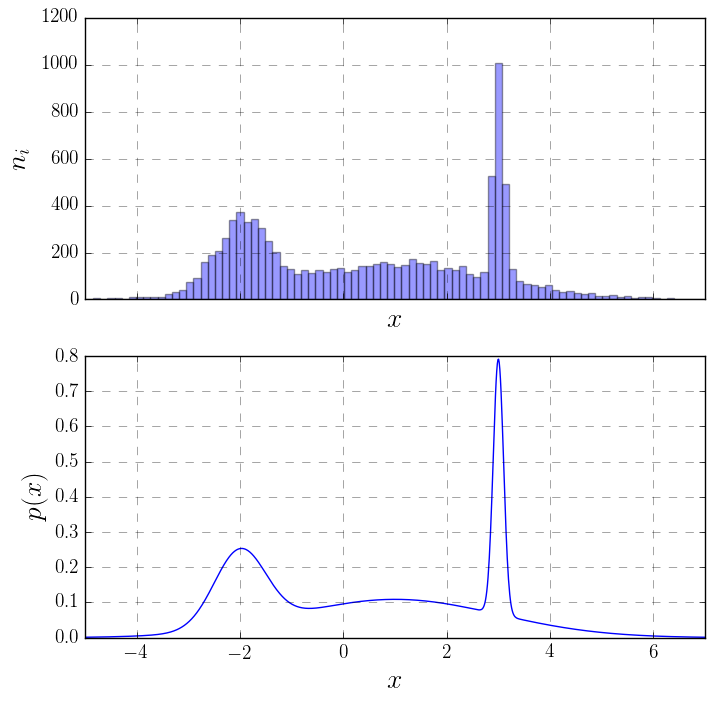

In [6]:
weights = [0.3, 0.6, 0.2]
scales  = [0.5, 2,   0.1]
locs    = [-2,  1,   3]
gm = GaussianMixtureD1(locs, scales, weights)
points = gm.sample(10000)
print(points.shape)

f, axarr = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
axarr[0].hist(points, bins=100, zorder=2, edgecolor='k', color='b', alpha=0.4);
axarr[0].grid(linestyle='--', alpha=0.5, zorder=0);
axarr[0].set_xlim(-5, 7);
axarr[0].set_xlabel('$x$'); axarr[0].set_ylabel('$n_i$');

x_range = np.linspace(-5, 7, 1001)
axarr[1].plot(x_range, gm.pdf(x_range))
axarr[1].grid(linestyle='--', alpha=0.5, zorder=0);
axarr[1].set_xlim(-5, 7);
axarr[1].set_xlabel('$x$'); axarr[1].set_ylabel('$p(x)$');

<a id='ml_gm_my_examples_2d'></a>
#### GaussianMixture2D<sup>[toc](#toc)</sup> <sup>[upp](#ml_gm_my_examples)</sup>

<a id='ml_gm_my_examples_nd'></a>
#### GaussianMixture<sup>[toc](#toc)</sup> <sup>[upp](#ml_gm_my_examples)</sup>

(10000, 1)


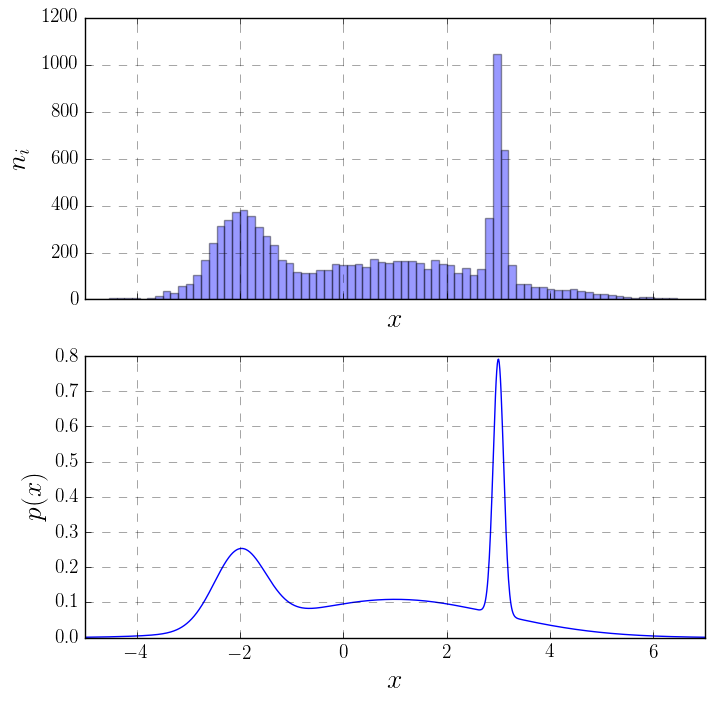

In [4]:
weights = [0.3, 0.6, 0.2]
scales  = [0.5, 2, 0.1]
locs    = [-2, 1, 3]
gm = GaussianMixture(locs, scales, weights)
points = gm.sample(10000)
print(points.shape)
points = points.flatten()
f, axarr = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
axarr[0].hist(points, bins=100, zorder=2, edgecolor='k', color='b', alpha=0.4);
axarr[0].grid(linestyle='--', alpha=0.5, zorder=0);
axarr[0].set_xlim(-5, 7)
axarr[0].set_xlabel('$x$'); axarr[0].set_ylabel('$n_i$');

x_range = np.linspace(-5, 7, 1001)
axarr[1].plot(x_range, gm.pdf(x_range[:, np.newaxis]))
axarr[1].grid(linestyle='--', alpha=0.5, zorder=0);
axarr[1].set_xlim(-5, 7)
axarr[1].set_xlabel('$x$'); axarr[1].set_ylabel('$p(x)$');

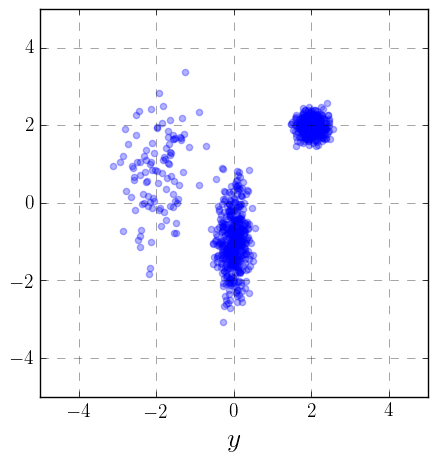

In [7]:
weights = [0.1, 0.5, 0.4]
scales  = [[0.5, 1.0], [0.2, 0.7], [0.2, 0.2]]
locs    = [[-2, 1], [0, -1], [2, 2]]
gm      = GaussianMixture(locs, scales, weights)
points  = gm.sample(1000)
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], color='b', alpha=0.3, zorder=2)
plt.grid(linestyle='--', alpha=0.5);
plt.xlim(-5, 5); plt.ylim(-5, 5);
plt.xlabel('$x$'); plt.xlabel('$y$');

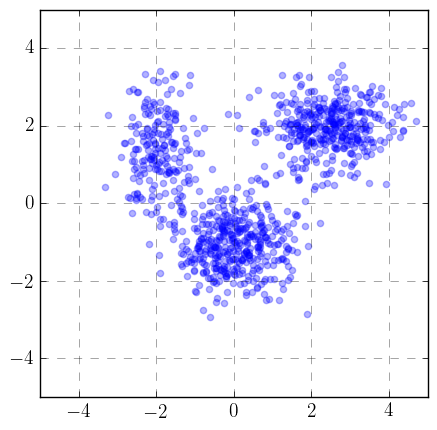

In [8]:
n_clusters = 3
weights = [0.2, 0.4, 0.4]
scales = [[0.5, 1.0], [0.8, 0.7], [0.8, 0.6]]
locs   = [[-2, 1.5], [0, -1], [2.5, 2]]
gm = GaussianMixture(locs, scales, weights)
points = gm.sample(1000)
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], color='b', alpha=0.3, zorder=2)
plt.grid(linestyle='--', alpha=0.5);
plt.xlim(-5, 5);
plt.ylim(-5, 5);

<a id='ml_gm_plotter'></a>
#### ContourPlotter2D<sup>[toc](#toc)</sup>

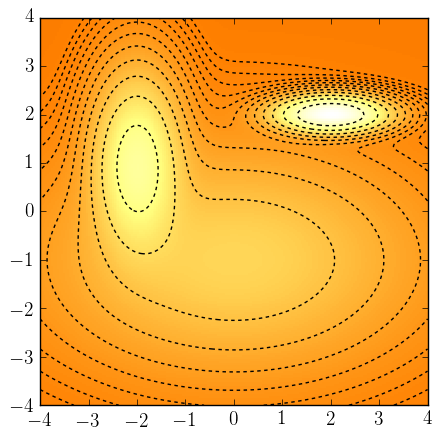

In [9]:
weights = [0.3, 0.5, 0.2]
scales = [[0.5, 1.0], [2.0, 1.2], [0.6, 0.2]]
locs   = [[-2, 1], [0, -1], [2, 2]]
gm = GaussianMixture(locs, scales, weights)
x_range = np.linspace(-4, 4, 200)
y_range = np.linspace(-4, 4, 200)
plotter = ContourPlotter2D(gm, x_range, y_range, vmin=-0.5, gamma=0.5, levels_style='continious', plot_contour=True,
                           figsize=(5, 5), dashed=True)
plotter()

<a id='ml_gm_sklearn'></a>
## Реализация из sklearn<sup>[toc](#toc)</sup>

<a id='ml_kmeans'></a>
# K-Means кластеризация<sup>[toc](#toc)</sup>

<a id='ml_kmeans_impl'></a>
## Реализация K-Means кластеризации<sup>[toc](#toc)</sup> <sup>[head](#ml_kmeans)</sup>

In [13]:
class MyKMeans(Checker):
    def __init__(self, n_clusters, n_runs=1, init='random', n_iters=10, eps=1e-3):
        """
        Аргументы:
        :param n_clusters: число кластеров
        :type  n_clusters: int
        :param n_runs: число запусков алгоритма (с разными начальными центрами)
        :type  n_runs: int
        :param n_iters: максимальное число итераций алгоритма
        :type  n_iters: int
        :param eps: если уменьшение инерции на очередном шаге меньше eps, то алгоритма завершает работу
        :type  eps: float, int
        """
        setters = {}
        getters = {}
        for name in ['n_clusters', 'n_runs', 'init', 'n_iters', 'eps', 'inertia']:
            setters[name] = self.__getattribute__('set_' + name)
            getters[name] = self.__getattribute__('get_' + name)
        super().__setattr__('_setters', setters)
        super().__setattr__('_getters', getters)
        self.set_n_clusters(n_clusters)
        self.set_n_runs(n_runs)
        self.set_init(init)
        self.set_n_iters(n_iters)
        self.set_eps(eps)
        
    def set_n_clusters(self, n_clusters):
        self._check_int(n_clusters, 'n_clusters')
        self._check_positive(n_clusters, 'n_clusters')
        self._n_clusters = n_clusters
    def set_n_iters(self, n_iters):
        self._check_int(n_iters, 'n_iters')
        self._check_positive(n_iters, 'n_iters')
        self._n_iters = n_iters
    def set_init(self, init):
        if isinstance(init, str):
            assert init in ['random']
            self._init_centers = None
            self._init_method = init
        elif isinstance(init, nd.array):
            self._init_centers = copy.deepcopy(init)
            self._init_method = 'outer'
            self._n_runs = 1
        else:
            raise TypeError('init must be either str or nd.array.')
    def set_n_runs(self, n_runs):
        self._check_int(n_runs, 'n_runs')
        self._check_positive(n_runs, 'n_runs')
        self._n_runs = n_runs
    def set_eps(self, eps):
        self._check_numeric(eps, 'eps')
        self._check_positive(eps, 'eps')
        self._eps = eps
    def set_inertia(self, inertia):
        assert False, 'Undefined'
    
    def get_n_clusters(self):
        return self._n_clusters
    def get_n_iters(self):
        return self._n_iters
    def get_n_runs(self):
        return self._n_runs
    def get_eps(self):
        return self._eps
    def get_init(self):
        assert False, 'Undefined'
        
    def get_centers(self):
        """
        returns np.array(dtype=np.float64) of shape (n_clusters, n_dim)
        """
        return copy.deepcopy(self._centers)
    def get_labels(self):
        """
        return np.array(dtype=np.int32) of shape (n_samples, )
        """
        return copy.deepcopy(self._labels)
    def get_inertia(self):
        return self._inertia
    
    def __getattr__(self, name):
        if name in self._getters:
            return self._getters[name]()
        raise AttributeError('Attribute "{}" not found'.format(name))
    
    def __setattr__(self, name, value):
        if name in self._setters:
            return self._setters[name](value)
        return super().__setattr__(name, value)
    
    def __call__(self, X, verbose=False):
        self.verbose = verbose
        X = np.array(X)
        self.print('Passed array X of shape {}'.format(X.shape))
        self._min_inertia = np.inf
        for n_run in range(self._n_runs):
            self.print('n_run = {}'.format(n_run))
            self._init(X, verbose=verbose)
            while (not self._stop()):
                self._iter(X, verbose=verbose)
            if self._inertia < self._min_inertia:
                self._best_labels = self._labels
                self._best_centers = self._centers
                self._min_inertia = self._inertia
        self._centers = self._best_centers.astype(np.float64)
        self._labels = self._best_labels.astype(np.int32)
        self._inertia = self._min_inertia

    def print(self, msg):
        if self.verbose:
            print(msg)
            
    def _stop(self):
        if self._n_iter >= self._n_iters:
            self.print('\tStop iterating: maximum number of iterations {} reached.'.format(self._n_iters))
            return True
        if self._inertia_decrease < self._eps:
            self.print('\tStop iterating: MSE decrease is less than {}'.format(self._eps))
            return True
        return False
    
    def _init(self, X, verbose=False):
        self._n_iter = 0
        self._inertia = np.inf
        if self._init_centers is None:
            indices = np.random.choice(X.shape[0], size=self._n_clusters)
            self._init_centers = X[indices]
        self._centers = self._init_centers
        self._update_labels(X)
        
    def _iter(self, X, verbose=False):
        self._update_centers(X, verbose=verbose)
        self._update_labels(X, verbose=verbose)
        self._n_iter += 1
        if verbose:
            print('\tafter n_iter = {}: inertia = {}'.format(self._n_iter, self._inertia))
            
    def _update_labels(self, X, verbose=False):
        labels = np.full(X.shape[0], -1, dtype=np.int32)
        inertia = 0
        for n_point in range(X.shape[0]):
            x = X[n_point]
            squared_distances = np.sum((self._centers - x[np.newaxis, :])**2, axis=1)
            label = np.argmin(squared_distances)
            inertia += squared_distances[label]
            labels[n_point] = label
        self._labels = labels
        self._inertia_decrease = self._inertia - inertia
        self._inertia = inertia
        
    def _update_centers(self, X, verbose=False):
        centers = []
        for l in range(self._n_clusters):
            centers.append(np.mean(X[self._labels == l, :], axis=0))
        self._centers = np.array(centers)

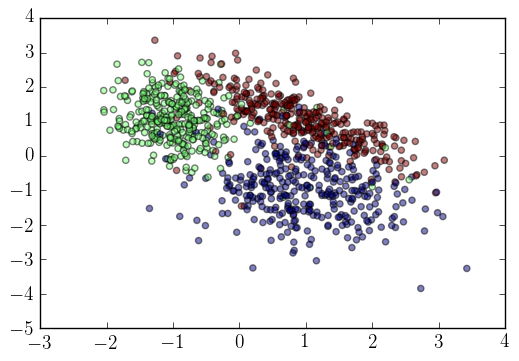

In [11]:
from sklearn.datasets import make_classification
n_samples = 1000
n_features = n_informative = 2
points, true_labels = make_classification(n_samples=n_samples, 
                 n_features=n_features, n_informative=n_informative, n_redundant=0, n_repeated=0, 
                 n_classes=3, n_clusters_per_class=1, weights=None, flip_y=0.05, class_sep=1.0, hypercube=True, 
                 shift=0.0, scale=1, shuffle=True, random_state=345)
plt.scatter(points[:, 0], points[:, 1], c=true_labels, alpha=0.5)

MSE = 824.152361936


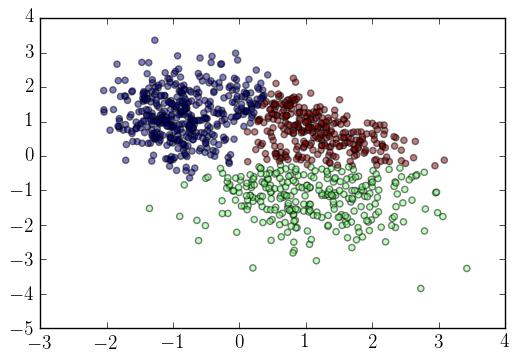

In [12]:
kmeans = MyKMeans(n_clusters=3, n_runs=5, n_iters=100)
kmeans(points, verbose=False)
pred_labels = kmeans.get_labels()
centers = kmeans.get_centers()
plt.scatter(points[:, 0], points[:, 1], c=pred_labels, alpha=0.5)
print('MSE =', kmeans.get_inertia())

<a id='ml_kmeans_task1'></a>
### Задача 1. Метрики кластеризации<sup>[toc](#toc)</sup> <sup>[head](#ml_kmeans)</sup>

**Adjusted Random Index**

**Advantages**

* Random (uniform) label assignments have a ARI score close to $0.0$ for any value of n_clusters and n_samples (which is not the case for raw Rand index or the V-measure for instance).
* Bounded range $[-1, 1]$: negative values are bad (independent labelings), similar clusterings have a positive ARI, $1.0$ is the perfect match score.
* No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

* Contrary to inertia, ARI requires knowledge of the ground truth classes while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).
* However ARI can also be useful in a purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection (TODO).


**Mathematical formulation**

If C is a ground truth class assignment and K the clustering, let us define a and b as:

* $a$, the number of pairs of elements that are in the same set in C and in the same set in K
* $b$, the number of pairs of elements that are in different sets in C and in different sets in K

The raw (unadjusted) Rand index is then given by:
$$
\text{RI} = \frac{a + b}{C_2^{n_{samples}}}
$$

Where $C_2^{n_{samples}}$ is the total number of possible pairs in the dataset (without ordering).

However the RI score does not guarantee that random label assignments will get a value close to zero (esp. if the number of clusters is in the same order of magnitude as the number of samples).

To counter this effect we can discount the expected RI $E[\text{RI}]$ of random labelings by defining the adjusted Rand index as follows:
$$
\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}
$$

Пусть имеется $K$ кластеров в каждой по $N$ точек, т.е. $n_{samples} = KN$. Рассмотрим случайную кластеризацию: каждому объекту присваивается одна из меток $1, \dots, K$ с вероятностью $1/K$. Найдите математическое ожидание RI. 

Переупорядочим набор объектов так, чтобы матрица кластеризации имела вид TODO

Всего нулей в верхней половине
$$
n_0 = C_K^2 N^2 = \frac{K(K-1) N^2}{2}.
$$
Всего единиц в верхней половине
$$
n_1 = C^2_N  K = \frac{N (N - 1)K}{2}.
$$

Пусть $\hat{A}$ --- матрица случайной кластеризации. Тогда ее элемент $\xi_{ij}$ --- случайная величина:
$$
\hat{a}_{ij} = 
\begin{cases}
1, &\text{ если } c_i = c_j, \\
0, &\text{ если } c_i \neq c_j.
\end{cases}
$$

Введем $\xi_{ij}$.

Вероятность того, что два объекта $x_i$ и $x_j$ попадут в один кластер равна $1/K$:
$$
\Prob(\hat{c}_i = \hat{c}_j) = \frac{1}{K}, \quad \Prob(\hat{c}_i \neq \hat{c}_j) = 1 - \frac{1}{K}.
$$

\begin{gather}
\mathbb{E}(RI) = \left(n_1 \cdot \frac{1}{K} + n_0 \cdot \left(1 - \frac{1}{K}\right)\right) \frac{2}{NK(NK - 1)} = 
\frac{N - 1 + N(K - 1)^2}{K(NK - 1)}.
\end{gather}

In [11]:
n_runs = 1000
N = 6
K = 8
A = np.zeros((N * K, N * K))
for i in range(K):
    A[i * N:(i + 1) * N, i * N:(i + 1) * N] = 1
RIs = []

for n_run in range(n_runs):
    labels = np.random.choice(K, size=N * K, p=np.ones(K) / K)
    B = np.zeros((N * K, N * K))
    for c in range(K):
        indices = np.where(labels == c)[0]
        B[np.ix_(indices, indices)] = 1
        #print(c, B[np.ix_(indices, indices)].shape)
    RI = (np.sum(A == B) - N * K) / ((N * K - 1) * N * K)
    RIs.append(RI)
RI_ana = (N - 1 + N * (K - 1) ** 2) / (K * (N * K - 1))
print('sim E[RI] =', np.mean(RIs))
print('ana E[RI] =', np.mean(RI_ana))

sim E[RI] = 0.794522163121
ana E[RI] = 0.795212765957


Пусть $n_1, \dots, n_K$ --- размеры кластеров. Число единиц (без учета диагональных) и нулей в матрице кластеризации равно
$$
N_1 = \Sum_{i=1}^K n_i(n_i - 1), \quad N_0 = n(n - 1) - N_1.
$$

\begin{gather}
\mathbb{E}(RI) = \left(N_1 \cdot \frac{1}{K} + N_0 \cdot \left(1 - \frac{1}{K}\right)\right) \frac{1}{n(n - 1)} = 
\frac{N_1 + (n(n - 1) - N_1)(K - 1)}{Kn(n - 1)}.
\end{gather}

In [12]:
n_runs = 1000
cluster_sizes = np.array([23, 3, 4, 5, 6, 4, 3, 21])
n_clusters = len(cluster_sizes)
n_objects  = np.sum(cluster_sizes)
N_pairs = n_objects * (n_objects - 1)
N_ones  = np.sum(cluster_sizes * (cluster_sizes - 1))
N_zeros = N_pairs - N_ones
#print('K = {}, n = {}, N = {}, N1 = {}, N0 = {}'.format(n_clusters, n_objects, N_pairs, N_ones, N_zeros))
A = np.zeros((n_objects, n_objects))
s = 0
for i in range(n_clusters):
    A[s:s + cluster_sizes[i], s:s + cluster_sizes[i]] = 1
    s += cluster_sizes[i]

RIs = []
for n_run in range(n_runs):
    labels = np.random.choice(n_clusters, size=n_objects, p=np.ones(n_clusters) / n_clusters)
    B = np.zeros((n_objects, n_objects))
    for c in range(n_clusters):
        indices = np.where(labels == c)[0]
        B[np.ix_(indices, indices)] = 1
    RI = (np.sum(A == B) - n_objects) / (n_objects * (n_objects - 1))
    RIs.append(RI)
#print('K = {}, n = {}, N = {}, N1 = {}, N0 = {}'.format(n_clusters, n_objects, N_pairs, N_ones, N_zeros))
RI_ana = float(N_ones + N_zeros * (n_clusters - 1)) / (n_clusters * N_pairs)
print('sim E[RI] =', np.mean(RIs))
print('ana E[RI] =', np.mean(RI_ana))

sim E[RI] = 0.713328644501
ana E[RI] = 0.713235294118


<a id='ml_kmeans_task2'></a>
### Задача 2. Асимптотики при K-Means кластеризации<sup>[toc](#toc)</sup> <sup>[head](#ml_kmeans)</sup>
Пусть $N$ точек равномерно раскиданы в квадрате $S(R) \triangleq [-R/2, R/2] \times [-R/2, R/2]$. Пусть используется K-Means кластеризация с $K$ кластерами. Как зависит inertia от числа кластеров $K$? Ответ требуется в виде $I \backsim f(K)$, где $f$ --- некоторая функция, которую требуется найти. Можно считать, что $K \ll n$.

**Решение**
Допустим, что $K = k^2$, то число кластеров --- квадрат некоторого числа. Замощение квадрата кластерами приблизительно равномерно. Поэтому рассмотрим некоторый кластер с размерами порядка $1/k \times 1/k$. Порядок инерции для него можно определить через интеграл:

$$
I = \Sum_{n = 1}^N \left((x_n - \Sum_{k=1}^K i_{nk} v_k)^2 + (y_n - \Sum_{k=1}^K i_{nk} u_k)^2\right) = 
\Sum_{k = 1}^K \Sum_{n = 1}^N i_{nk} \left((x_n - v_k)^2 + (y_n - u_k)^2\right)
$$
При фиксированных центрах $\{v_k, u_k\}$, точка $(x, y)$ принадлежит тому кластеру, к центру которого она ближе всего расположена. Фактически это разбивает всю область $D$ на области $D_1, \dots, D_K$. Причем это разбиение --- диаграмма вороного.

Теперь сделаем следующее преобразование. Разделим область $D$ на множество областей $V_1, V_2, \dots$ размера $\Delta x \Delta y$. В случае $D = [-R/2, R/2] \times [-R/2, R/2] \in \mathbb{R}^2$ можем, например, поделить квадрат на квадраты меньшего размера, взяв $\Delta x = \Delta y = R / L$, $L \in \mathbb{N}$. Но пока будем рассматривать общий случай. Пусть $L$ --- число областей, $L \approx |D| / |V| = |D| / (\Delta x \Delta y)$.
При достаточно маленьких областях $V_1, V_2, \dots$ (большом числе $L$) можно считать, что каждая область $V_l$ полностью содержится в области некоторого кластера $D_k$. Пусть $z_{lk} = 1$, если область $V_l \subseteq D_k$.
На самом деле есть еще области, которые лежат на границе кластеров, но таких областей пренебрижимо малое количество при $|D| / (\Delta x \Delta y \rightarrow) \infty$ (это аккуратно доказывается в курсах мат. аналаза, когда изучается интегрирование по плоскости).

Тогда
$$
I = \Sum_{l} \Sum_{n=1}^N \mathbb{1}[(x_n, y_n) \in V_l]\Sum_{k=1}^K z_{lk}\left((x_n - v_k)^2 + (y_n - u_k)^2\right) = \Sum_{l} \Sum_{n=1}^N 
$$
Жалее будем уменьшать размеры областей $V_l$, т.е. устремим $\Delta x \Delta y$ к нулю. Заметим, что если размер области $V_l$ мал, по сравнению с размером области $D_k$, в которой $V_l$ содержится, то 
можно считать, что расстояние от всех точек $V_l$ до центра $(v_k, u_k)$ кластера $k$ одно и то же. Обозначим через $(x_l^0, y_l^0)$ некоторую точку области $V_l$. Тогда
$$
I \approx \Sum_{l} \Sum_{n=1}^N \mathbb{1}[(x_n, y_n) \in V_l]\Sum_{k=1}^K z_{lk}\left((x_l^0 - v_k)^2 + (y_l^0 - u_k)^2\right).
$$
Пусть $N_l$ --- число точек в области $V_l$. Тогда
$$
I \approx \Sum_{l} N_l \Sum_{k=1}^K z_{lk}\left((x_l^0 - v_k)^2 + (y_l^0 - u_k)^2\right) = \Sum_{k=1}^K \Sum_{l\colon V_l \subset D_k} N_l \left((x_l^0 - v_k)^2 + (y_l^0 - u_k)^2\right) = 
N\Sum_{k=1}^K \Sum_{l\colon V_l \subset D_k} \left((x_l^0 - v_k)^2 + (y_l^0 - u_k)^2\right) \hat{p}_l.
$$
Здесь $\hat{p}_l = N_l / N$ есть вероятность попадания точки в область $V_l$ в вероятностной модели, где $N$ точек бросаются случайно в область $D$. 

Пусть появление точек в области $D$ действительно связано с некоторым процессом бросания точек, причем плотность вероятности равна $p(x, y)$. Тогда 
$$
\Exp_{\{(x_i,y_i)\} \backsim p(x,y)}[\hat{p}_l] = \frac{1}{N} \Sum_{i=1}^N \Exp[\mathbb{1}[(x_i, y_i) \in V_l]] = 
\Int_{V_l} p(x, y) dx dy.
$$
$$
\Exp[I] = N \Sum_{k=1}^K \Sum_{l\colon V_l \subset D_k} \Int_{V_l} \left((x_l^0 - v_k)^2 + (y_l^0 - u_k)^2\right) p(x,y)dx dy \approx N \Sum_{k=1}^K \Int_{D_k} \left((x - v_k)^2 + (y - u_k)^2\right) p(x,y)dx dy
$$
$$
\Exp[I/N] = \Sum_{k=1}^K \Int_{D_k} \left((x - v_k)^2 + (y - u_k)^2\right) p(x,y)dx dy.
$$
Здесь разбиение $D$ на $D_1, \dots, D_K$ --- диаграмма Воронова (как уже было выяснено ранее).

Вернемся к случаю с $D = S(R)$. Пусть $K = k^2, k \in \mathbb{N}$. Тогда из интуитивно понятно, что в качестве $\{D_k\}$ можно взять квадраты со сторонами $R / k$, замощающие весь квадрат $S(R)$. При этом
$$
\Exp[I/N] = \frac{k^2}{R^2} \Int_{-R/(2k)}^{R/(2k)}\Int_{-R/(2k)}^{R/(2k)} (x^2 + y^2) dx dy = \frac{k^2}{R^2}\frac{R^4}{6k^4} = \frac{R^2}{6k^2}.
$$
Таким образом, 
$$
\Exp[I/N] = \frac{R^2}{6k^2} = \frac{R^2}{6K}.
$$

$I \backsim \frac{1}{K}$

Таким образом $\log I = C - 2 * \log K$

In [13]:
from sklearn.cluster import KMeans

R = 2.0
X = np.linspace(-R / 2, R / 2, 201)
Y = np.linspace(-R / 2, R / 2, 201)
xx, yy = np.meshgrid(X, Y)
points = [(x, y) for x, y in zip(xx.flatten(), yy.flatten())]
points = np.array(points)
inertias = []

n_clusters_range = range(4, 37)
for n_clusters in tqdm(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, 
                tol=0.0001, precompute_distances='auto', verbose=0, random_state=3454)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

100%|██████████| 33/33 [01:53<00:00,  6.60s/it]


In [14]:
print('Inertia per sample:', kmeans.inertia_ / len(points))
print('Theoretical inertia:', R ** 2 / (6 * n_clusters ))

Inertia per sample: 0.0186217885453
Theoretical inertia: 0.018518518518518517


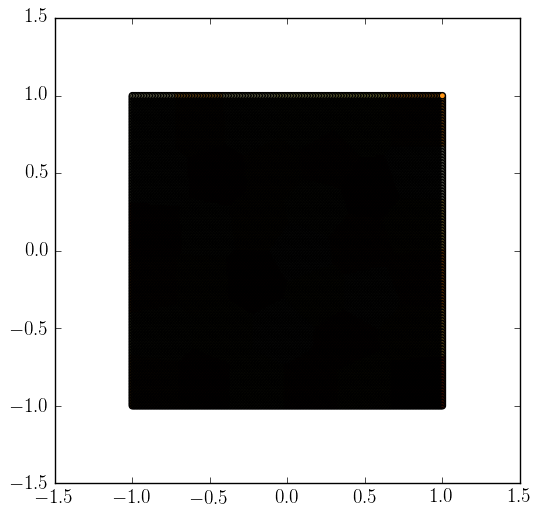

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels_, cmap='afmhot', vmin=-n_clusters / 2, vmax=n_clusters + 1)

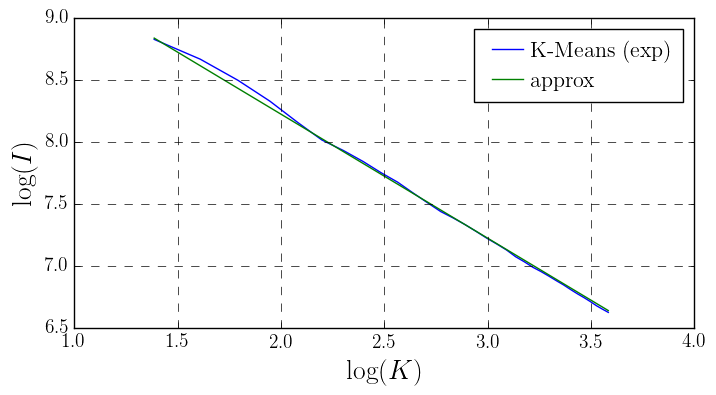

In [16]:
# Совмещение зависимостей методом наименьших квадратов
log_inertias = np.log(inertias)
log_n_clusters_range = np.log(n_clusters_range)
C = np.mean(log_inertias + log_n_clusters_range)
plt.figure(figsize=(8, 4))
plt.plot(log_n_clusters_range, log_inertias, label='K-Means (exp)')
plt.plot(log_n_clusters_range, C - log_n_clusters_range, label='approx')
plt.xlabel('$\log(K)$');
plt.ylabel('$\log(I)$');
plt.legend();
plt.grid(linestyle='--');

<a id='ml_kmeans_task22'></a>
#### Задача 2.2. Нахождение областей в случае $K=5$<sup>[toc](#toc)</sup> <sup>[head](#ml_kmeans)</sup>

0.44210000000000005

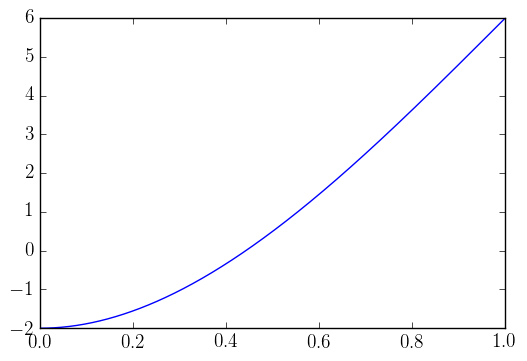

In [17]:
a = np.linspace(0, 1, 10001)
plt.plot(a, 12 * a**2 - 2 - 4 * a**3)
a[np.argmin(np.abs(12 * a**2 - 2 - 4 * a**3))]

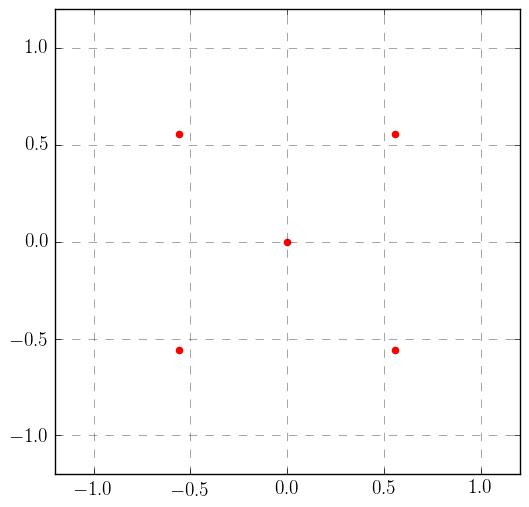

In [18]:
a = 0.4421
x_a = y_a = (3 - (a + 2) * (1 - a)**2) / (3 * (2 - (1 - a)**2))
xs = np.array([x_a - 1, x_a - 1, 1 - x_a, 1 - x_a, 0])
ys = np.array([y_a - 1, 1 - y_a, 1 - y_a, y_a - 1, 0])

R = 2.0
X = np.linspace(-R / 2, R / 2, 501)
Y = np.linspace(-R / 2, R / 2, 501)
xx, yy = np.meshgrid(X, Y)
points = [(x, y) for x, y in zip(xx.flatten(), yy.flatten())]
points = np.array(points)

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, color='r');
#plt.scatter(points[:, 0], points[:, 1], color='b', alpha=0.3);
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.grid(linestyle='--', alpha=0.5);

Inertia per sample: 0.0184766446119
Theoretical inertia: 0.018518518518518517


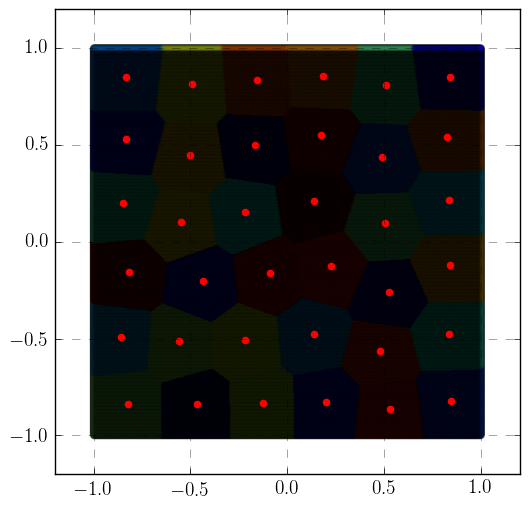

In [19]:
centers = np.hstack((xs[:, None], ys[:, None]))
n_clusters = 36
init = 'k-means++'
n_init = 10
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init)
kmeans.fit(points);
found_centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=labels, alpha=0.3);
plt.scatter(found_centers[:, 0], found_centers[:, 1], color='r');
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.grid(linestyle='--', alpha=0.5);
print('Inertia per sample:', kmeans.inertia_ / len(points))
print('Theoretical inertia:', R ** 2 / (6 * n_clusters))

<a id='ml_kmeans_task23'></a>
#### Задача 2.3. Области в случае нормального распределения<sup>[toc](#toc)</sup> <sup>[head](#ml_kmeans)</sup>

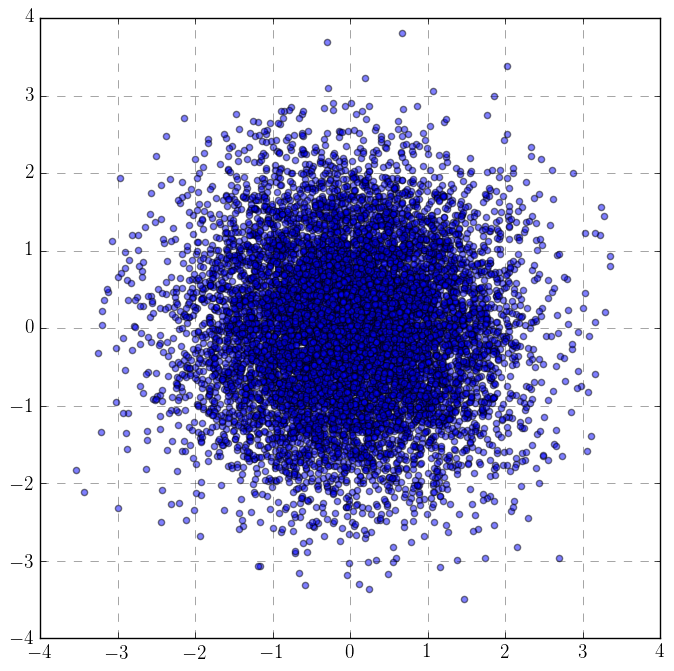

In [20]:
xlocs = [0]
ylocs = [0]
xscales = [1]
yscales = [1]
gm = GaussianMixtureD2(xlocs, ylocs, xscales, yscales, weights=[1])
points = gm.sample(10000)

plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], alpha=0.5)
plt.grid(linestyle='--', alpha=0.5)
plt.xlim((-4, 4)); plt.ylim((-4, 4));

Inertia per sample: 0.24294088147
Inertia per sample: 0.226899884128
Inertia per sample: 0.213662546154
Inertia per sample: 0.202531181841


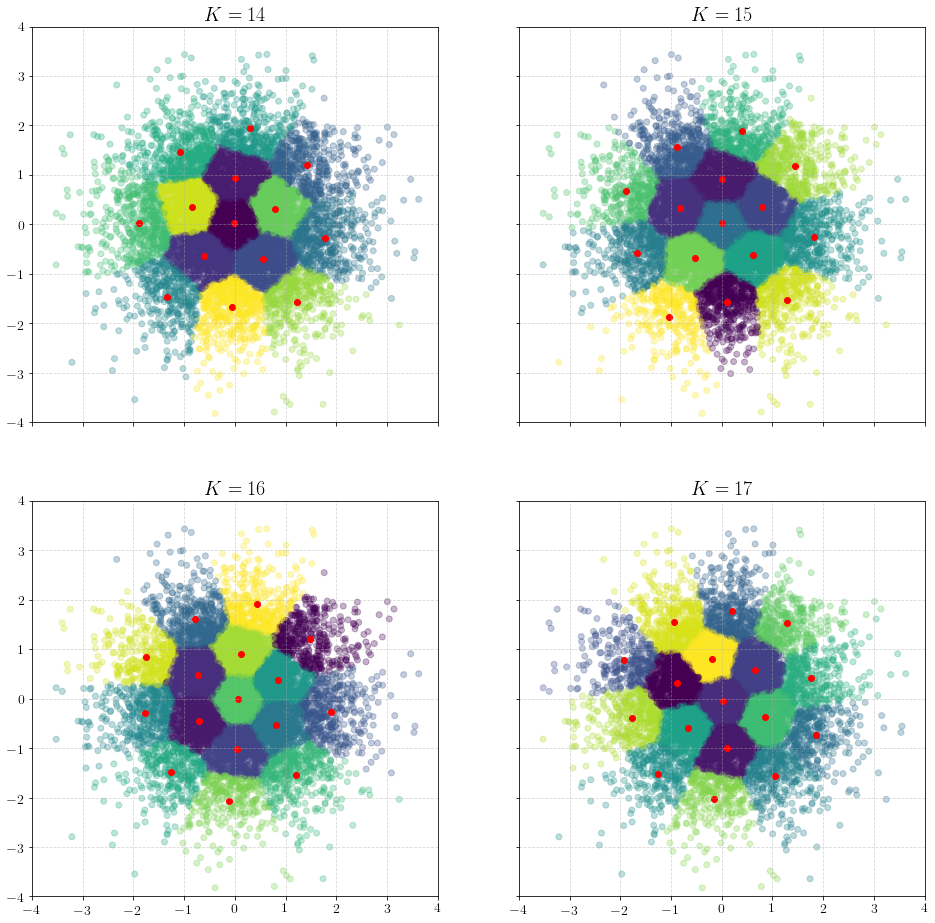

In [153]:
init = 'k-means++'
n_init = 10
n_clusters_range = list(range(14, 18))
n_plots = len(n_clusters_range)

figsize = (8, 8)
x_figsize, y_figsize = figsize

if n_plots > 1:
    n_cols = 2
    n_rows = int(np.ceil(n_plots / n_cols))
    f, axarr = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, 
                            figsize=(n_cols * x_figsize, n_rows * y_figsize))
else:
    f = plt.figure(figsize=figsize)
    ax = plt.subplot()
    axarr = [[ax]]

for n_plot, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init)
    kmeans.fit(points);
    found_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    ax = axarr[n_plot // n_cols][n_plot % n_cols]
    ax.scatter(points[:, 0], points[:, 1], c=labels, alpha=0.3);
    ax.scatter(found_centers[:, 0], found_centers[:, 1], color='r');
    ax.set_xlim((-4, 4)); ax.set_ylim((-4, 4));
    ax.grid(linestyle='--', alpha=0.5);
    ax.set_title('$K = {}$'.format(n_clusters))
    print('Inertia per sample:', kmeans.inertia_ / len(points))
    #print('Theoretical inertia:', R ** 2 / (6 * n_clusters))

<a id='em_algorithm'></a>
# EM-алгоритм<sup>[toc](#toc)</sup>

<a id='em_algorithm_theory'></a>
## Теоретическое обоснование<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

Пусть мы наблюдаем отсчеты $\boldX =\{\boldx_1, \dots, \boldx_n\}$ некоторого параметрического распределения $\Prob(\boldX;\boldtheta)$. Как и ранее нам хотелось бы по выборке $\boldX$ получить представление об истинных параметрах $\boldtheta^*$ породившего ее распределения. Пусть мы обладаем некоторой информацией об устройстве процесса порождения выборки $\boldX$, т.е. о распределении $\Prob(\boldX; \boldtheta)$: нам известно (или мы делаем предположение), что в процессе генерирования $\boldX$ участвуют латентные (скрытые) переменные $\boldZ$, так что процесс генерирования описывается следующей графической моделью:

TODO рисунок

Иначе говоря,
$$
\Prob(\boldX,\boldZ;\boldtheta) = \Prob(\boldZ;\boldtheta) \Prob(\boldX|\boldZ;\boldtheta)
$$
**Задать модель**, означает задать распределение $\Prob(\boldX,\boldZ;\boldtheta)$, параметризованное по $\boldtheta$.

В результате получаем, что
$$
\Prob(\boldX;\boldtheta) = \Sum_{\boldZ \in \mathcal{Z}^n} \Prob(\boldX|\boldZ; \boldtheta) \Prob(\boldZ;\boldtheta), \text{ или } \Prob(\boldX;\boldtheta) = \Int_{\mathcal{Z}^n} \Prob(\boldX|\boldZ; \boldtheta) \Prob(\boldZ;\boldtheta) d\boldZ
$$

Как и ранее, для нахождения $\boldtheta^*$ хотим максимизировать правдоподобие
$$
\LogLike(\boldX;\boldtheta) = \log \Prob(\boldX; \boldtheta) = \log \left( \Sum_{\boldZ} \Prob(\boldX|\boldZ; \boldtheta) \Prob(\boldZ;\boldtheta) \right),
$$
однако суммирование (или интегрирование) под знаком логарифма значительно усложняют задачу. Поэтому пойдем другим путем, так называемым путем **вариационных нижних оценок**. 

В контексте наличия скрытых переменных, правдоподобие 
$$
\LogLike(\boldX;\boldtheta) = \log \Prob(\boldX; \boldtheta) 
$$
называется **неполным правдоподобием**. **Полным правдоподобием** называется величина
$$
\LogLike(\boldX,\boldZ;\boldtheta) = \log \Prob(\boldX, \boldZ; \boldtheta).
$$
 
Заметим, что мы ничего не говорим о независимости случайных величин $\boldx_1, \dots, \boldx_n$, подразумевая, что они могут быть зависимы, и источник генерирует значения $\boldx$ блоками по $n$ величин.


#### Метод вариационных нижних оценок<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>
Суть этого пути проста. Пусть имеется функция $f(\boldx, \boldtheta)$, которую требуется максимизировать по $\boldx$ и $\boldtheta$, но непосредственные вычисления очень сложны.
$$
f(\boldx, \boldtheta) \rightarrow \max_{\boldx, \boldtheta}
$$
Пусть существует функция $g(\boldx, \boldtheta)$, такая что
\begin{gather}
\forall \boldx \in \mathcal{X} \rightarrow  f(\boldx,\boldtheta) \ge g(\boldx,\boldtheta)\\
\forall \boldx \in \mathcal{X}~ \exists \boldtheta_0(\boldx) \in \Theta \colon f(\boldx, \boldtheta_0) = g(\boldx, \boldtheta_0).
\end{gather}
Функция $g(\boldx, \boldtheta)$ называется **вариационной нижней оценкой функции $f(\boldx, \boldtheta)$**.

Теперь можем построить итеративный процесс нахождения максимума $f(\boldx, \boldtheta)$. Пусть $\boldx^{(i)}$ и $\boldtheta^{(i)}$ значения $\boldx$ и $\boldtheta$ спустя $i$ итераций. Тогда одна итерация $(i + 1)$ следующим образом:
\begin{gather}
\boldtheta^{(i + 1)} = \boldtheta_0(\boldx^{(i)}) \\
\boldx^{(i + 1)} = \arg\max_\boldx g(\boldx, \boldtheta^{(i+1)})
\end{gather}
Остается лишь выбрать начальные значения $\boldx^{(0)}$ и $\boldtheta^{(0)}$. Теперь вернемся обратно к ЕМ-алгоритму.

$$
\Prob(\boldZ| \boldX; \boldtheta) = \frac{\Prob(\boldX, \boldZ;\boldtheta)}{\Prob(\boldX;\boldtheta)} \Rightarrow \Prob(\boldX;\boldtheta) = \frac{\Prob(\boldZ, \boldZ;\boldtheta)}{\Prob(\boldZ|\boldX; \boldtheta)}
$$
Таким образом
$$
\LogLike(\boldX;\boldtheta) = \log \Prob(\boldX; \boldtheta) = \log \Prob(\boldX,\boldZ;\boldtheta) - \log \Prob(\boldZ|\boldX;\boldtheta)
$$

Теперь введем вариационную переменную (аналог $\boldtheta$ для $f(\boldx, \boldtheta)$). Пусть $q(\boldZ)$  &mdash; некоторое распределение над $\boldZ \in \mathcal{Z}$. Тогда
\begin{gather*}
\LogLike(\boldX;\boldtheta) = \Sum_\boldZ q(\boldZ) \log \Prob(\boldX,\boldZ;\boldtheta) - \Sum_\boldZ q(\boldZ)\log \Prob(\boldZ|\boldX;\boldtheta) = \Sum_\boldZ q(\boldZ) \log \left(\frac{\Prob(\boldX,\boldZ;\boldtheta)}{q(\boldZ)}\right) - \Sum_\boldZ q(\boldZ)\log \left(\frac{\Prob(\boldZ|\boldX;\boldtheta)}{q(\boldZ)}\right) = \\ =
\Sum_\boldZ q(\boldZ) \log \Prob(\boldX, \boldZ;\boldtheta) + \underbrace{\left(- \Sum_\boldZ q(\boldZ) \log q(\boldZ)\right)}_{H(q(\boldZ))} + \underbrace{\Sum_\boldZ q(\boldZ)  \log \left(\frac{q(\boldZ)}{\Prob(\boldZ|\boldX;\boldtheta)}\right)}_{KL(q(\boldZ)\|\Prob(\boldZ|\boldX;\boldtheta))\ge 0}
\end{gather*}
Заметим, что если $q(\boldZ) = \Prob(\boldZ|\boldX;\boldtheta)$, то расстояние Кульбака-Лейблера равно нулю. Таким образом, распределение $q(\boldZ)$ действительно выступает в роли вариационного параметра:
\begin{align}
f(\boldtheta, q(\boldZ)) &= \LogLike(\boldX;\boldtheta)\\
g(\boldtheta, q(\boldZ)) &= \Sum_\boldZ q(\boldZ) \log \Prob(\boldX, \boldZ;\boldtheta) + \left(- \Sum_\boldZ q(\boldZ) \log q(\boldZ)\right)
\end{align}

Теперь можем расписать итерационный процесс. Пусть спустя $i$ процессов итерации получили $q^{(i)}(\boldZ)$ и $\boldtheta^{(i)}$. Тогда на шаге $(i+1)$ для $q(\boldZ)$ получаем
$$
q^{(i+1)}(\boldZ) = \Prob(\boldZ|\boldX;\boldtheta^{(i)})
$$
Теперь прооптимизируем по $\boldtheta$, правую часть, полагая $q(\boldZ) = q^{(i + 1)}(\boldZ)$:
$$
\boldtheta^{(i+1)} = \arg\max_{\boldtheta} \left(\Sum_\boldZ q(\boldZ) \log \Prob(\boldX, \boldZ;\boldtheta) - \Sum_\boldZ q(\boldZ) \log q(\boldZ)\right) = \arg\max_{\boldtheta} \left(q(\boldZ) \log \Prob(\boldX, \boldZ;\boldtheta)\right) = \arg\max_{\boldtheta} \left(\Prob(\boldZ|\boldX;\boldtheta^{(i)}) \log \Prob(\boldX, \boldZ;\boldtheta)\right).
$$
Во втором случае имеет место максимизация **математического ожидания полного правдоподобия**:
$$
\Exp_{\boldZ \backsim q(\boldZ)} \LogLike(\boldX,\boldZ;\boldtheta) = \Exp_{\boldZ \backsim q(\boldZ)} \log \left(\Prob(\boldX,\boldZ;\boldtheta)\right)
$$

Таким образом, пришли к процедуре оптимизации, называемой **EM-алгоритмом**.

#### EM-алгоритм<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

В общем случае EM-алгоритм выглядит следующим образом.
\begin{align}
\text{E-шаг}\colon& &q^{(i+1)}(\boldZ) &= p(\boldZ|\boldX;\boldtheta^{(i)}) \\
\text{M-шаг}\colon& &\boldtheta^{(i + 1)} &= \arg\max_{\boldtheta} \Exp_{\boldZ\backsim q^{(i + 1)}(\boldZ)} \LogLike(\boldX,\boldZ;\boldtheta)
\end{align}

Теперь предположим, что пары величин $\{(\boldx_i, \boldz_i)\}_{i=1}^n$ независимы в совокупности (т.е. любое подмножество пар независимо):
$$
\Prob(\boldX,\boldZ;\boldtheta) = \Prod_{i=1}^n \Prob(\boldx_i,\boldz_i;\boldtheta).
$$

#### Независимые пары $\{(\boldx_i, \boldz_i)\}_{i=1}^n$<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

Напомним, что из попарной  независимости случайных величин не следует их независимость в совокупности. TODO предложить пример.

Тогда
\begin{gather}
\Prob(\boldZ|\boldX;\boldtheta) = \frac{\Prob(\boldX,\boldZ;\boldtheta)}{\Prob(\boldX;\boldtheta)} = 
\frac{\Prob(\boldX,\boldZ;\boldtheta)}{\Sum_{\boldZ' \in \mathcal{Z}^n}\Prob(\boldX,\boldZ';\boldtheta)} = 
\frac{\Prod_{i=1}^n \Prob(\boldx_i,\boldz_i;\boldtheta)}{\Sum_{\boldz'_1, \dots, \boldz'_n \in \mathcal{Z}}\Prod_{j=1}^n\Prob(\boldx_j,\boldz'_j;\boldtheta)} = \frac{\Prod_{i=1}^n \Prob(\boldx_i,\boldz_i;\boldtheta)}{\Prod_{j=1}^n\Sum_{\boldz'\in\mathcal{Z}}\Prob(\boldx_j,\boldz';\boldtheta)} = 
\frac{\Prod_{i=1}^n \Prob(\boldx_i,\boldz_i;\boldtheta)}{\Prod_{j=1}^n\Prob(\boldx_j;\boldtheta)} = 
\Prod_{i=1}^n \frac{\Prob(\boldx_i,\boldz_i;\boldtheta)}{\Prob(\boldx_i;\boldtheta)} \\
\Prob(\boldZ|\boldX;\boldtheta) = \Prod_{i=1}^n \Prob(\boldz_i|\boldx_i;\boldtheta)
\end{gather}

При этом упрощается вычисление мат. ожидания полного правдоподобия по апостериорному распределению $\Prob(\boldZ|\boldX;\boldtheta)$:
\begin{gather}
\Exp_{\boldZ\backsim\Prob(\boldZ|\boldX;\boldtheta)} = \Sum_{\boldZ \in \mathcal{Z}^n} \Prob(\boldZ|\boldX;\boldtheta) \log \Prob(\boldX,\boldZ;\boldtheta) = \Sum_{\boldz_1,\dots,\boldz_n\in\mathcal{Z}^n} \left\{\left(\Prod_{i=1}^n\Prob(\boldz_i|\boldx_i;\boldtheta)\right) \left(\Sum_{j=1}^n\log \Prob(\boldx_j,\boldz_j;\boldtheta)\right)\right\} = \\ =
\Sum_{\boldz_1,\dots,\boldz_n\in\mathcal{Z}^n} \left\{\Sum_{j=1}^n\left(\log \Prob(\boldx_j,\boldz_j;\boldtheta) \cdot \Prod_{i=1}^n\Prob(\boldz_i|\boldx_i;\boldtheta) \right)\right\} =
\Sum_{j=1}^n \left\{ \Sum_{\boldz_1,\dots,\boldz_n\in\mathcal{Z}^n} \left(\log \Prob(\boldx_j,\boldz_j;\boldtheta) \cdot \Prod_{i=1}^n\Prob(\boldz_i|\boldx_i;\boldtheta) \right) \right\} = \\ =
\Sum_{j=1}^n  \Sum_{\boldz \in\mathcal{Z}} \Prob(\boldz|\boldx_j;\boldtheta) \log \Prob(\boldx_j,\boldz;\boldtheta) = 
\Sum_{j=1}^n \Exp_{\boldz \backsim \Prob(\boldz|\boldx_j; \theta)} \log \Prob(\boldx_j, \boldz; \boldtheta) = 
\Sum_{j=1}^n \Exp_{\boldz \backsim \Prob(\boldz|\boldx_j; \theta)} \LogLike(\boldx_j, \boldz; \boldtheta).
\end{gather}
Таким образом, **математическое ожидание полного правдоподобия равно сумме математических ожиданий правдоподобий каждого отсчета**.

В общем случае EM-алгоритм выглядит следующим образом.
\begin{align}
\text{E-шаг}\colon& &q^{(i+1)}(\boldZ) &= \Prod_{j=1}^n \Prob(\boldz|\boldx_j;\boldtheta^{(i)}) = \Prod_{i=1}^n
q_j^{(i)}(\boldz), \text{ где } q_j^{(i)}(\boldz) = \Prob(\boldz|\boldx_j;\boldtheta^{(i)}).
\\
\text{M-шаг}\colon& &\boldtheta^{(i + 1)} &= \arg\max_{\boldtheta} \left(\Sum_{j=1}^n \Exp_{\boldz \backsim q_j^{(i)}(\boldz)} \LogLike(\boldx_j,\boldz;\boldtheta)\right)
\end{align}

<a id='em_algorithm_examples'></a>
## Примеры использования<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

<a id='em_algorithm_example_1'></a>
### Одномерное нормальное распределение<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

In [164]:
mgen.pdf(x_range[:, None]).shape

(1001, 4)

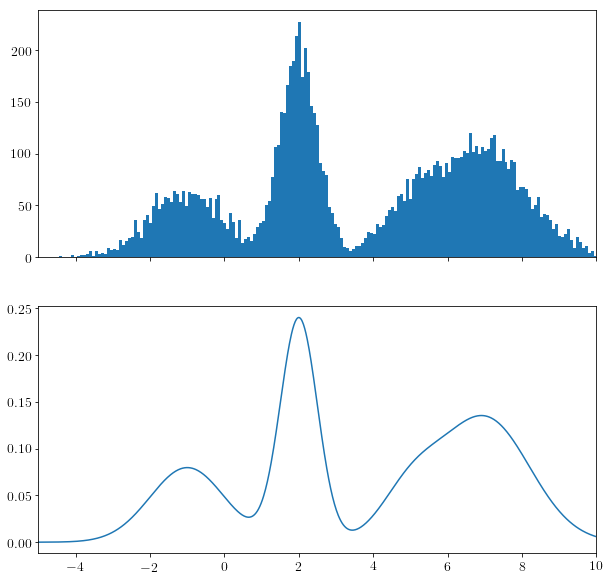

In [165]:
true_probs = np.array([0.2, 0.3, 0.1, 0.4])
true_means = np.array([-1, 2, 5, 7])
true_stds = np.array([1, 0.5, 0.8, 1.2])
mgen = GaussianMixtureD1(true_means, true_stds, true_probs)
n_points = 10000
points = mgen.sample(n_points)
f, axarr = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
axarr[0].hist(points, bins=200);
axarr[0].set_xlim((-5, 10));
x_range = np.linspace(-5, 12, 1001)
axarr[1].plot(x_range, mgen.pdf(x_range));

$$
\mathbb{E}_{Z\backsim p(Z|X,\theta)}(\mathcal{L}(X,Z)) =\Sum_{n=1}^N\Sum_{k=1}^K \gamma_{nk}\left(\log \pi_k - \log \sigma_k - \frac{(x_n - \mu_k)^2}{2\sigma_k^2} \right) + const.
$$

\begin{gather}
\pi_k = \frac{\Sum_{n=1}^N \gamma_{nk}}{N}\\
\mu_k = \frac{\Sum_{n=1}^N \gamma_{nk} x_n}{\Sum_{n=1}^N \gamma_{nk}}
\end{gather}

In [166]:
N = n_points
K = 4
gammas = np.zeros((N, K))

probs  = np.ones(K) / K
stds   = np.ones(K)
means  = np.arange(K)

probs = true_probs
stds = true_stds
means = true_means

points = np.array(points)
X = points[:, np.newaxis]
probs = probs[np.newaxis, :]
means = means[np.newaxis, :]
stds = stds[np.newaxis, :]
likelihoods = []
    
for n_iter in range(10):
    # E-шаг
    gammas = (probs / stds) * np.exp(-((X - means) / stds)**2)
    gammas /= np.sum(gammas, axis=1)[:, np.newaxis]
    # Подсчет правдоподобия
    A = 0.5 * ((X - means) / stds) ** 2
    L = np.sum(gammas * (np.log(probs) - np.log(stds) - A))
    print('n_iter = {}, L = {}'.format(n_iter, L))
    # M-шаг
    probs = np.sum(gammas, axis=0) / N
    stds  = np.sqrt(np.sum(gammas * (X - means) ** 2, axis=0) / np.sum(gammas, axis=0))
    means = np.sum(gammas * X, axis=0) / np.sum(gammas, axis=0)

    probs = probs[np.newaxis, :]
    stds = stds[np.newaxis, :]
    means = means[np.newaxis, :]
    
probs = probs.flatten()
stds = stds.flatten()
means = means.flatten()
for k in range(K):
    print('EM  : k={:<2}, pi={:2.5f}, mu={:2.5f}, sigma={:2.5f}'.format(
        k, probs[k], means[k], stds[k]))
    
for k in range(K):
    print('True: k={:<2}, pi={:2.5f}, mu={:2.5f}, sigma={:2.5f}'.format(
        k, true_probs[k], true_means[k], true_stds[k]))

n_iter = 0, L = -15611.628427882682
n_iter = 1, L = -15255.226227659296
n_iter = 2, L = -15174.346198440888
n_iter = 3, L = -15161.580277457066
n_iter = 4, L = -15160.794018842545
n_iter = 5, L = -15162.710372732237
n_iter = 6, L = -15165.376145617778
n_iter = 7, L = -15168.23535710859
n_iter = 8, L = -15171.08857126897
n_iter = 9, L = -15173.85343683081
EM  : k=0 , pi=0.19610, mu=-1.03570, sigma=0.97610
EM  : k=1 , pi=0.31350, mu=2.01978, sigma=0.48075
EM  : k=2 , pi=0.14974, mu=4.99509, sigma=0.60919
EM  : k=3 , pi=0.34066, mu=7.28677, sigma=0.97574
True: k=0 , pi=0.20000, mu=-1.00000, sigma=1.00000
True: k=1 , pi=0.30000, mu=2.00000, sigma=0.50000
True: k=2 , pi=0.10000, mu=5.00000, sigma=0.80000
True: k=3 , pi=0.40000, mu=7.00000, sigma=1.20000


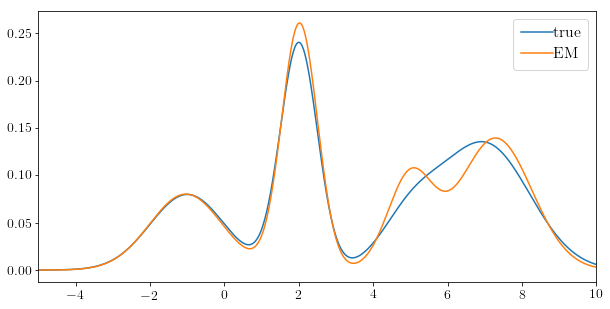

In [169]:
true_mgen = GaussianMixtureD1(true_means, true_stds, true_probs)
mgen = GaussianMixtureD1(means, stds, probs,)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharex=True)
x_range = np.linspace(-5, 12, 1001)
ax.plot(x_range, true_mgen.pdf(x_range), label='true');
ax.plot(x_range, mgen.pdf(x_range), label='EM')
ax.legend();
ax.set_xlim((-5, 10));

<a id='em_algorithm_impl_norm'></a>
## Реализация EM-алгоритма для смеси нормальных с.в.<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

In [14]:
from scipy.stats import multivariate_normal

class EMMultivariateNormal(Checker):
    def __init__(self, n_clusters=5, n_runs=10, init='kmeans', max_iter=10, **kmeans_params):
        self._set_n_clusters(n_clusters)
        self._set_n_runs(n_runs)
        self._set_max_iter(max_iter)
        self._set_kmeans_params(kmeans_params)
    def _set_n_runs(self, n_runs):
        self._n_runs = n_runs
    def _set_max_iter(self, max_iter):
        self._max_iter = max_iter
    def _set_n_clusters(self, n_clusters):
        self._n_clusters = n_clusters
    def _set_kmeans_params(self, kmeans_params):
        self._kmeans_params = copy.deepcopy(kmeans_params)
        self._kmeans_params['n_clusters'] = n_clusters
        self._kmeans_params.setdefault('n_iters', 300)
        self._kmeans_params.setdefault('n_runs', 5)
        self._kmeans_params.setdefault('eps', 0.01)
        
    def __call__(self, X):
        self.X = np.array(X) 
        self._n_samples, self._n_dim = self.X.shape
        self._initialize_process()
        while (not self._stop()):
            self._E_step()
            self._M_step()
            self._n_iter += 1
        
    def _initialize_process(self):
        self._kmeans = MyKMeans(**self._kmeans_params)
        self._kmeans(self.X)
        self._kmeans_labels  = self._kmeans.get_labels()
        self._kmeans_centers = self._kmeans.get_centers()

        self._Gammas = np.zeros((self._n_samples, self._n_clusters))
        self._Gammas[np.arange(self._n_samples).astype(np.int32), self._kmeans_labels] = 1.0
        self._Probs = np.sum(self._Gammas, axis=0) / self._n_samples
        self._Means = np.array(self._kmeans_centers)
        self._Covs = {}
        self._M_step()
        self._n_iter = 0
        
    def _E_step(self):
        for n_cluster in range(self._n_clusters):
            self._Gammas[:, n_cluster] = self._Probs[n_cluster] * \
                multivariate_normal.pdf(self.X, mean=self._Means[n_cluster], cov=self._Covs[n_cluster])
        self._Gammas /= np.sum(self._Gammas, axis=1)[:, None]
        
    def _M_step(self):
        # Updating prior probs
        self._Probs = np.sum(self._Gammas, axis=0) / self._n_samples

        # Updating means and covariances
        for n_cluster in range(self._n_clusters):
            weights = self._Gammas[:, n_cluster][:, None]
            X = weights * self.X
            mean = np.sum(X, axis=0) / np.sum(weights)
            self._Means[n_cluster] = mean
            
            X = np.sqrt(weights) * (self.X - self._Means[n_cluster][None, :])
            cov = np.dot(X.T, X) / np.sum(weights)
            self._Covs[n_cluster] = cov 
        
    def _stop(self):
        if self._n_iter >= self._max_iter:
            return True
        return False
    
    def get_gammas(self):
        return np.array(self._Gammas)
    def get_probs(self):
        return np.array(self._Probs)
    def get_means(self):
        return np.array(self._Means)
    def get_covs(self):
        return np.array(self._Covs)
    def get_mixture_params(self):
        return self.get_probs(), self.get_means(), self.get_covs()

<a id='em_algorithm_example_2'></a>
### Двумерное (N-мерное) нормальное распределение<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>

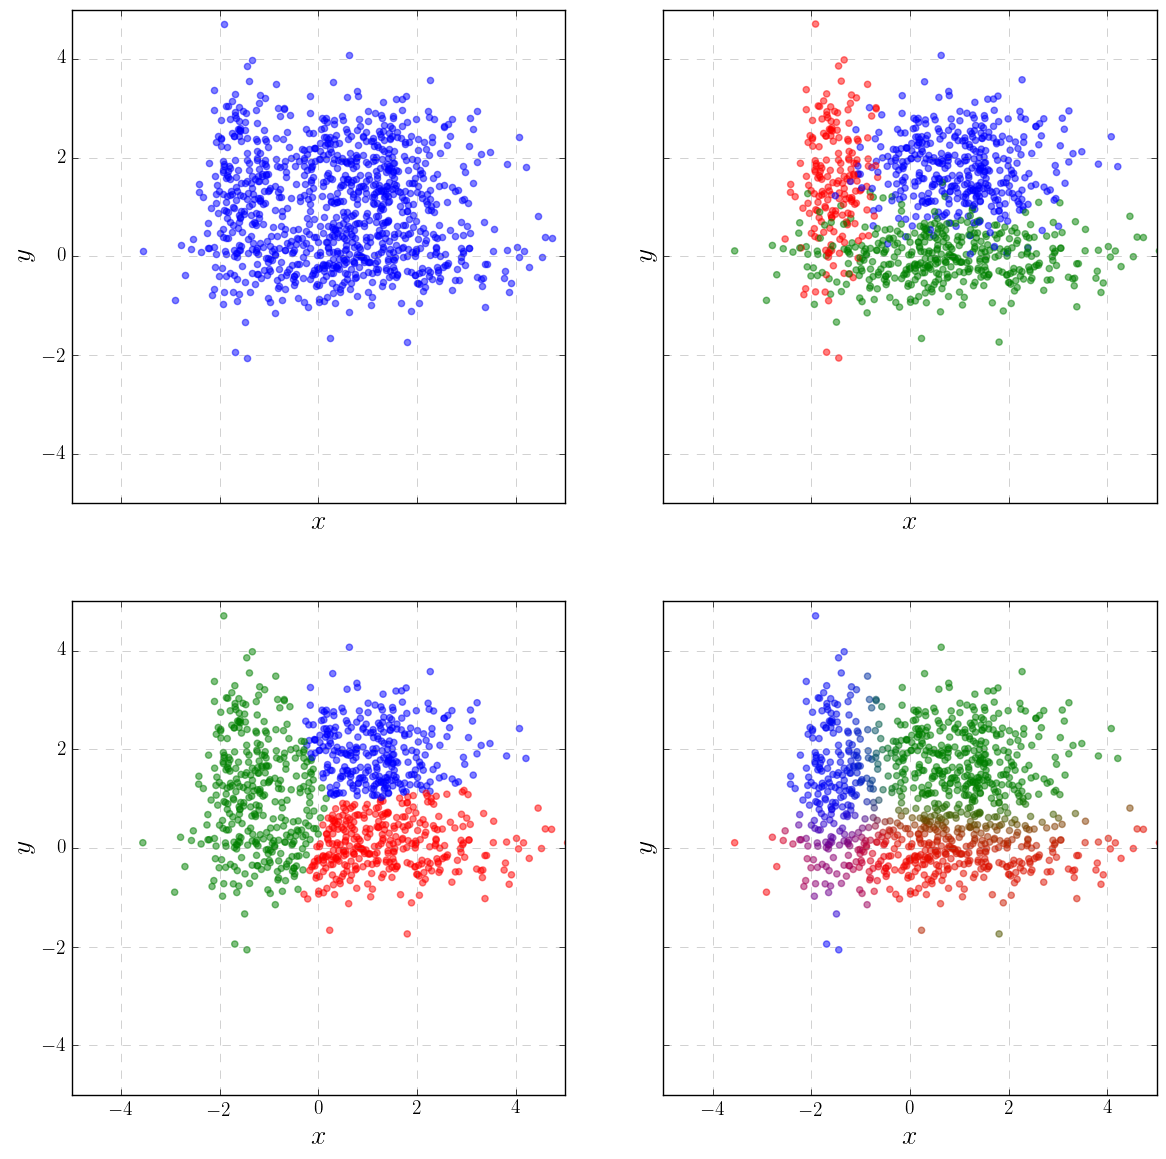

In [16]:
n_clusters = 3
n_samples = 1000
colors = np.array([[1.0, 0.0, 0.0],[ 0.0,  0.5,  0.0], [0.0, 0.0, 1.0]])

weights = [0.2, 0.4, 0.4]
scales  = [[0.4, 1.0], [1.5, 0.5], [1.0, 0.7]]
locs    = [[-1.5, 1.5], [0.8, 0], [1, 1.8]]
gm = GaussianMixture(locs, scales, weights)

fsize = 7
fig, axarr = plt.subplots(2, 2, figsize=(2 * fsize, 2 * fsize), sharex=True, sharey=True)

ax = axarr[0, 0]
points, true_labels = gm.sample(n_samples, return_components=True)
ax.scatter(points[:, 0], points[:, 1], c='b', alpha=0.5, edgecolor='b', zorder=2)
ax.grid(linestyle='--', color='gray', alpha=0.5);
ax.set_xlabel('$x$'); ax.set_ylabel('$y$');

ax = axarr[0, 1]
true_indicators = np.zeros((n_samples, n_clusters), dtype=np.float32)
true_indicators[np.arange(n_samples, dtype=np.int32), true_labels] = 1.0
point_colors = np.dot(true_indicators, base_colors)
ax.scatter(points[:, 0], points[:, 1], c=point_colors, alpha=0.5, edgecolors=point_colors, zorder=2)
ax.grid(linestyle='--', color='gray', alpha=0.5);
ax.set_xlabel('$x$'); ax.set_ylabel('$y$');

ax = axarr[1, 0]
kmeans = MyKMeans(n_clusters, n_runs=10, n_iters=300, eps=0.01)
kmeans(points)
labels = kmeans.get_labels()
indicators = np.zeros((n_samples, n_clusters), dtype=np.float32)
indicators[np.arange(n_samples, dtype=np.int32), labels] = 1.0
point_colors = np.dot(indicators, base_colors)
ax.scatter(points[:, 0], points[:, 1], c=point_colors, alpha=0.5, edgecolors=point_colors, zorder=2)
ax.grid(linestyle='--', color='gray', alpha=0.5);
ax.set_xlabel('$x$'); ax.set_ylabel('$y$');

ax = axarr[1, 1]
em = EMMultivariateNormal(n_clusters, n_runs=10, init='kmeans', max_iter=20)
em(points)
gammas = em.get_gammas()
point_colors = np.dot(gammas, colors)
ax.scatter(points[:, 0], points[:, 1], c=point_colors, alpha=0.5, edgecolors=point_colors, zorder=2)
ax.grid(linestyle='--', color='gray', alpha=0.5);
ax.set_xlabel('$x$'); ax.set_ylabel('$y$');

ax.set_xlim(-5, 5); ax.set_ylim(-5, 5);

<a id='em_algo_bern'></a>
## Реализация EM-алгоритма для смеси бернуллиевских с.в.<sup>[toc](#toc)</sup> <sup>[head](#em_algorithm)</sup>
* [Теория](#em_algo_bern_theory)
* [Реализация](#em_algo_bern_impl)
* [Применение](#em_algo_bern_usage)
    * [Загрузка данных](#em_algo_bern_load)
    * [K = 10](#em_algo_bern_K10)
    * [K = 15](#em_algo_bern_K15)
    * [K = 20](#em_algo_bern_K20)
    * [K = 25](#em_algo_bern_K25)
    * [K = 5 per digit](#em_algo_bern_K5_pd)

![Templates](https://www.dropbox.com/s/lx47mcsq3yyhmk2/templates.png?dl=1)

Пусть всего у нас $K$ шаблонов, то есть $K$ компонент смеси. Каждый объект выборки $-$ это $D$-мерный бинарный вектор: $X = \{ \mathbf{x}_i \}_{i=1}^N, \mathbf{x}_i \in \{ 0, 1 \}^D$. Каждое из $K$ бинарных распределений задает вероятность признака $d$ принимать значение 1, обозначаемое ${\theta}_{kd}$. Соответственно вероятность признака $d$ быть равным 0 есть $1 - {\theta}_{kd}$. Таким образом, правдоподобие объекта $\mathbf{x}_i$ при условии принадлежности распределению $k$ есть:
$$
	p(\mathbf{x}_i | t_i = k, \theta) = \prod_{d=1}^D \theta_{kd}^{x_{id}} (1 - \theta_{kd})^{1 - x_{id}},
$$
где $t_i$ - скрытая переменная, принимающая значения от $1$ до $K$, кодирующие к какому распределению относится объект. Априорное распределение на $t_i$ будем полагать равномерным: $p(t_i = k) = 1 / K$.

EM-алгоритм итеративно оптимизирует логарифм неполного правдоподобия:
$$
	\log p(X | \theta) = \sum_{i=1}^N \log \sum_{k = 1}^K p(\mathbf{x}_i | t_i = k, \theta) - N \log K
$$
На E-шаге рассчитывается апостериорное распределение на скрытые переменные при старых значениях параметров:
$$
	p(T | X, \theta^{old}) = \frac{p(T) p(X | T, \theta^{old})}{p(X | \theta^{old})}
$$
В данном случае апостериорные распределения для каждого объекта независимы, то есть, $p(T | X, \theta) = \prod_{i=1}^N p(t_i | \mathbf{x}_i, \theta)$.

Затем, на M-шаге выполняется оптимизиация по параметрам распределений:
$$
	\theta^{new} = \arg \max_{\theta} \mathbb{E}_{p(T | X, \theta^{old})} \log p(X, T | \theta) 
$$
В данном случае максимум можно найти, приравняв производную по каждому из параметров к нулю.

Эти два шага чередуются необходимое число итераций.

<a id='em_algo_bern_theory'></a>
### Теория<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

Выпишите конечные формулы для апостериорных распределений $p(t_i | \mathbf{x}_i, \theta)$. Найдите оценки для параметров, получаемые на M-шаге.

$$
p(\boldx_n, t_n=k;\boldtheta) = \pi_k p(\boldx_n|t_n=k;\boldtheta) = \pi_k\Prod_{d=1}^D \theta_{kd}^{x_{nd}}(1-\theta_{kd})^{1 - x_{nd}}.
$$

$$
\gamma_{nk} = p(t_n = k|\boldx_n, \boldtheta) = \frac{p(\boldx_n, t_n; \boldtheta)}{p(\boldx_n; \boldtheta)} = \frac{\pi_k \cdot p(\boldx_n| t_n=k; \boldtheta)}{\Sum_{i=1}^K \pi_i \cdot p(\boldx_n| t_n = i; \boldtheta)} = 
\frac{\pi_k \cdot \Prod_{d=1}^D \theta_{kd}^{x_{nd}}(1 - \theta_{kd})^{1-x_{nd}}}{\Sum_{i=1}^K \pi_i \cdot \Prod_{d=1}^D \theta_{id}^{x_{nd}}(1 - \theta_{id})^{1-x_{nd}}}.
$$

На M-шаге требуется найти максимум ожидания правдоподобия
\begin{gather}
\Exp\LogLike = \Exp_{T \backsim p(T|X;\boldtheta)} \LogLike(X, T; \theta) = \Sum_{n=1}^N \Exp_{t \backsim p(t | \boldx_n;\boldtheta)} \log p(\boldx_n, t_n; \boldtheta) = \Sum_{n=1}^N \Sum_{k=1}^K p(t_n=k|\boldx_n; \boldtheta) \log p(\boldx_n, t_n = k; \boldtheta) = \\ 
= \Sum_{n=1}^N\Sum_{k=1}^K \gamma_{nk} \left(\log \pi_k + \Sum_{d=1}^D \left\{x_{nd} \log \theta_{kd} + (1 - x_{nd}) \log (1 - \theta_{nd})\right\} \right)
\end{gather}

$$
\frac{\partial\Exp\LogLike}{\partial \pi_k} = \frac{\Sum_{n=1}^N \gamma_{nk}}{\pi_k} - \lambda = 0 \Rightarrow \pi_k \lambda = \Sum_{n=1}^N \gamma_{nk} \Rightarrow \lambda = N, \pi_k = \frac{\Sum_{n=1}^N \gamma_{nk}}{N} = \frac{N_k}{N}, \text{ где } N_k = \Sum_{n=1}^N \gamma_{nk}.
$$

$$
\frac{\partial\Exp\LogLike}{\partial \theta_{kd}} = \Sum_{n=1}^N \gamma_{nk} \left(\frac{x_{nd}}{\theta_{kd}} - \frac{1 - x_{nd}}{1 - \theta_{kd}}\right) = \Sum_{n=1}^N \gamma_{nk} \frac{x_{nd}(1 - \theta_{kd}) - (1 - x_{nd})\theta_{kd}}{\theta_{kd}(1 - \theta_{kd})} = \Sum_{n=1}^N \gamma_{nk} \frac{x_{nd}- \theta_{kd}}{\theta_{kd}(1 - \theta_{kd})} \Rightarrow \theta_{kd} = \frac{ \Sum_{n=1}^N \gamma_{nk} x_{nd}}{ \Sum_{n=1}^N \gamma_{nk}} = 
\frac{ \Sum_{n=1}^N \gamma_{nk} x_{nd}}{N_k}
$$

В случае $\pi_k = 1 / K$ получаем **EM-алгоритм**:

* E-шаг

$$
\gamma_{nk} = p(t_n = k|\boldx_n, \boldtheta) = \frac{\Prod_{d=1}^D \theta_{kd}^{x_{nd}}(1 - \theta_{kd})^{1-x_{nd}}}{\Sum_{i=1}^K \Prod_{d=1}^D \theta_{id}^{x_{nd}}(1 - \theta_{id})^{1-x_{nd}}}.
$$

* M-шаг

$$\theta_{kd} = \frac{ \Sum_{n=1}^N \gamma_{nk} x_{nd}}{ \Sum_{n=1}^N \gamma_{nk}} = 
\frac{ \Sum_{n=1}^N \gamma_{nk} x_{nd}}{N_k}$$

Запустите EM-алгоритм на изображениях цифр 6 и 9 для $K=2$, сделайте 30 итераций. Постройте график логарифма правдоподобия в зависимости от числа итераций, а также визуализируйте шаблоны, полученные после пересчета на каждой итерации. Удалось ли вам получить шаблоны этих цифр?

<a id='em_algo_bern_impl'></a>
### Реализация<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [3]:
class EMBernoulli:
    def __init__(self, n_components, max_iter=10, loglikelihoods=True, verbose=False, eps=1e-40, 
                 omit_constants=True, batch_size=None, memory_limit=512):
        """
        Аргументы:
            param: eps
            param: omit_constants   - 
            param: batch_size       - 
            param: memory_limit - 
            
        """
        self._n_components = n_components
        self._max_iter = max_iter
        self._loglikelihoods = loglikelihoods
        self._verbose = verbose
        self._eps = eps
        self._omit_constants = omit_constants
        self._batch_size = batch_size
        self._memory_limit = memory_limit
        
    def get_thetas(self):
        if self._omit_constants:
            const_values = self.maximums[self.equal_columns]
            thetas = np.zeros((self._n_components, self._n_dim + len(const_values)), dtype=np.float64)
            thetas[:, self.equal_columns] = const_values[None, :]
            thetas[:, self.nequal_columns] = self.T
        else:
            thetas = self.T
        return np.array(thetas)
    def get_gammas(self):
        return np.array(self.G.T)

    def __call__(self, X):
        self._initialize(X)
        while (not self._stop()):
            self._E_step()
            self._M_step()
            self._print('n_iter = {}: likelihood = {}'.format(self._n_iter,  self._likelihoods[-1]))
            self._n_iter += 1
            
    def _initialize(self, X):
        X = np.array(X)
        if self._omit_constants:
            self.maximums = np.max(X, axis=0)
            self.minimums = np.min(X, axis=0) 
            self.equal_columns = np.where(self.maximums == self.minimums)[0]
            self.nequal_columns = np.where(self.maximums != self.minimums)[0]
            self.X  = X[:, self.nequal_columns]      # [N x D]
        else:
            self.X = X                               # [N x D]            
        self.Xt = self.X.T                           # [D x N]
        self._n_samples, self._n_dim = self.X.shape
        
        self._find_batch_size()
        
        self.G = np.random.uniform(size=(self._n_components, self._n_samples)) # [K x N]
        self.G = np.maximum(self.G, self._eps)
        self.G /= np.sum(self.G, axis=0)[None, :]
        self.T = np.zeros((self._n_components, self._n_dim))                   # [K x D]
        
        self._M_step()
        self._n_iter = 0
        self._likelihoods = []
        
    def _find_batch_size(self):
        if self._batch_size is not None:
            return
        full_size = (1.0 * self._n_samples * self._n_dim * self._n_components * self.X.dtype.type(0).nbytes) / (2 ** 20)
        if full_size > self._memory_limit:
            alpha = 1.0 * full_size / self._memory_limit
            self._batch_size = int(self._n_samples / alpha + 0.5)
        else:
            self._batch_size = self._n_samples
        new_full_size = (1.0 * self._batch_size * self._n_dim * self._n_components * self.X.dtype.type(0).nbytes) / (2 ** 20)
        self._print('Found batch size = {} for memory limit = {}'.format(self._batch_size, self._memory_limit))
        self._print('\tFull size = {}, new full size = {}'.format(int(full_size), int(new_full_size)))
        
    def _E_step(self):
        T = self.T.reshape((self._n_components, -1, self._n_dim))                # [K x 1 x D]
        if self._batch_size == 1:
            likelihood = 0
            for n_sample in range(self._n_samples):
                x = self.X[[n_sample], :]                                        # [1 x D]
                logs = np.sum(x * np.log(self.T) + (1 - x) * np.log(1 - self.T), axis=1) # [K x D] -> [K]
                likelihood += np.sum(self.G[:, n_sample] * logs)
                self.G[:, n_sample] = self._softmax_vector(logs)
            self._likelihoods.append(likelihood)
            return
        if self._batch_size < self._n_samples:
            Ss = []
            for i in range(0, self._n_samples, self._batch_size):
                left, right = i, min(i + self._batch_size, self._n_samples)
                X = self.X[left:right].reshape((-1, right - left, self._n_dim))  # [1 x B x D]
                S = np.sum(X * np.log(T) + (1 - X) * np.log(1 - T), axis=2)      # [K x B x D] -> [K x B]
                Ss.append(S)                                                     # [K x N]
            S = np.concatenate(Ss, axis=1)
            assert S.shape == (self._n_components, self._n_samples)
        elif self._batch_size == self._n_samples:
            X = self.X.reshape((-1, self._n_samples, self._n_dim))               # [1 x N x D]
            S = np.sum(X * np.log(T) + (1 - X) * np.log(1 - T), axis=2)          # [K x N x D] -> [K x N]
            assert S.shape == (self._n_components, self._n_samples)
        else:
            assert False, "Something is wrong!"
        likelihood = np.sum(np.multiply(self.G, S))
        self.G = self._softmax_column(S)
        self._likelihoods.append(likelihood)

    def _M_step(self):
        if self._batch_size < self._n_samples:
            for n_component in range(self._n_components):
                weights = self.G[[n_component], :]                               # [1 x N]
                self.T[n_component, :] = np.sum(weights * self.Xt, axis=1) / np.sum(weights)
        elif self._batch_size == self._n_samples:
            G = self.G.reshape((self._n_components, 1, self._n_samples))
            X = self.Xt.reshape((1, self._n_dim, self._n_samples))
            self.T = np.sum(G * X, axis=2) / np.sum(self.G, axis=1)[:, None]
        else:
            assert False, "Something is wrong!"
        self.T = np.maximum(self.T, self._eps)
        self.T = np.minimum(self.T, 1 - self._eps)

    def _stop(self):
        if self._n_iter >= self._max_iter:
            return True
        return False

    def _softmax_vector(self, x):
        max_prob = np.max(x)
        x -= max_prob
        np.exp(x, x)
        sum_prob = np.sum(x)
        x /= sum_prob
        return x
    
    def _softmax_column(self, X):
        max_prob = np.max(X, axis=0)[None, :]
        X -= max_prob
        np.exp(X, X)
        sum_prob = np.sum(X, axis=0)[None, :]
        X /= sum_prob
        return X

    def _print(self, msg):
        if self._verbose:
            print(msg)

<a id='em_algo_bern_usage'></a>
### Применение<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

<a id=em_algo_bern_load></a>
#### Загрузка данных<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

Загрузите обучающую и тестовую выборки [здесь](https://www.dropbox.com/s/8092jukwxapc04o/mnist.zip?dl=0). Первый столбец $-$ это метка цифры, изображенной на данной картинке. Бинаризуйте все изображения по порогу 127.

In [7]:
digits = pd.read_csv('./mnist/mnist_train.csv', header=None)
digits = digits.values
labels = digits[:, 0]
digits = digits[:, 1:]
digits = (digits > 127).astype(np.int32)
n_samples, n_dim = labels.shape, digits.shape
print(n_samples, n_dim)

(60000,) (60000, 784)


<a id=em_algo_bern_Ks></a>
#### Анализ при различном числе компонент<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [63]:
active_labels = [6, 9]
mask = np.zeros(n_samples, dtype=np.int32)
for label in active_labels:
    mask += (labels == label)
mask = mask > 0
X = digits[mask]
print(X.shape)

em = EMBernoulli(n_components=2, max_iter=60, batch_size=None, verbose=True)
em(X)

(11867, 784)
Found batch size = 11867 for memory limit = 512
	Full size = 55, new full size = 55
n_iter = 0: likelihood = -2223298.146696233
n_iter = 1: likelihood = -2221509.137574735
n_iter = 2: likelihood = -2167001.701574203
n_iter = 3: likelihood = -2129125.3428346515
n_iter = 4: likelihood = -2101772.5817481615
n_iter = 5: likelihood = -2053815.4211320556
n_iter = 6: likelihood = -2037440.8585880117
n_iter = 7: likelihood = -2027752.6552295783
n_iter = 8: likelihood = -2018261.4920360679
n_iter = 9: likelihood = -2008461.130168741
n_iter = 10: likelihood = -1999734.7083823283
n_iter = 11: likelihood = -1996824.1993495082
n_iter = 12: likelihood = -1996067.6813212964
n_iter = 13: likelihood = -1995878.0692221432
n_iter = 14: likelihood = -1995549.0518628766
n_iter = 15: likelihood = -1995006.2030637555
n_iter = 16: likelihood = -1994760.4247129445
n_iter = 17: likelihood = -1994661.394178764
n_iter = 18: likelihood = -1994388.3543457096
n_iter = 19: likelihood = -1994273.254638331

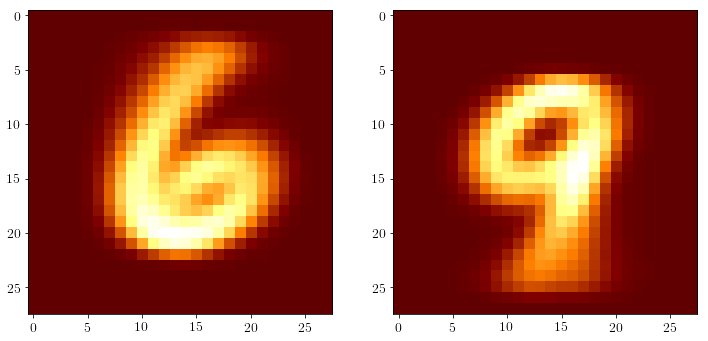

In [64]:
thetas = em.get_thetas()
thetas = thetas.reshape((2, 28, 28))
fsize = 6
fig, axes = plt.subplots(1, 2, figsize=(2 * fsize, fsize))
axes[0].imshow(thetas[0], cmap='afmhot', vmin=-0.2, interpolation='none')
axes[1].imshow(thetas[1], cmap='afmhot', vmin=-0.2, interpolation='none')

<a id=em_algo_bern_Ks></a>
#### Анализ при различном числе компонент<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

Выполните аналогичное исследование для всех изображений всех цифр. Используйте 50 итераций и разные значения $K=10, 15, 20$, для каждого визуализируйте логарифм неполного правдоподобия и получаемые шаблоны после каждой итерации EM-алгоритма. Если ваша реализация работает слишком медленно, отберите некоторое количество изображений каждой цифры из всей выборки и работайте только с ними. 

In [85]:
def find_templates(digits, labels, n_components, percentage=1.0, 
                   memory_limit=512, max_iter=50, em_verbose=True, batch_size=None, random_state=1234):
    if percentage < 1.0:
        train_digits, val_digits, train_labels, val_labels = train_test_split(digits, labels, train_size=percentage, 
                                                                              stratify=labels)
    else:
        train_digits, train_labels = digits, labels
    print(train_digits.shape, train_labels.shape)

    em = EMBernoulli(n_components=n_components, batch_size=batch_size, 
                     memory_limit=memory_limit, max_iter=max_iter, verbose=em_verbose)
    em(train_digits)
    thetas = em.get_thetas()
    pkl.dump(thetas, open('K{}_templates.pkl'.format(n_components), 'wb'))
    pkl.dump(em.get_gammas(), open('K{}_gammas.pkl'.format(n_components), 'wb'))

In [69]:
def plot_templates(n_components, fsize=2, n_cols=5):
    thetas = pkl.load(open('K{}_templates.pkl'.format(n_components), 'rb'))
    thetas.shape = (n_components, 28, 28)
    n_rows = int(np.ceil(n_components / n_cols))
    fig, axarr = plt.subplots(n_rows, n_cols, figsize=(n_cols * fsize, n_rows * fsize))
    for n_digit, (n_row, n_col) in enumerate(product(range(n_rows), range(n_cols))):
        ax = axarr[n_row][n_col]
        ax.imshow(thetas[n_digit], cmap='afmhot', vmin=-0.2, interpolation='none')
        ax.set_title('{}'.format(n_digit))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()

<a id=em_algo_bern_K10></a>
#### K = 10<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [67]:
percentage = 1.0
n_components = 10
find_templates(digits, labels, n_components, percentage, 50)

(60000, 784) (60000,)
Found batch size = 19855 for memory limit = 512
	Full size = 1547, new full size = 512
n_iter = 0: likelihood = -12362465.463715378
n_iter = 1: likelihood = -12348050.278899595
n_iter = 2: likelihood = -10983556.60459272
n_iter = 3: likelihood = -10218542.96721087
n_iter = 4: likelihood = -10065091.308142899
n_iter = 5: likelihood = -9996373.928740792
n_iter = 6: likelihood = -9951262.538247706
n_iter = 7: likelihood = -9919372.591208888
n_iter = 8: likelihood = -9900894.793881044
n_iter = 9: likelihood = -9886666.097567163
n_iter = 10: likelihood = -9874238.380078709
n_iter = 11: likelihood = -9863326.56652313
n_iter = 12: likelihood = -9854225.905359654
n_iter = 13: likelihood = -9847092.598267574
n_iter = 14: likelihood = -9841250.980987744
n_iter = 15: likelihood = -9836807.423651695
n_iter = 16: likelihood = -9832955.784345891
n_iter = 17: likelihood = -9829271.092825571
n_iter = 18: likelihood = -9825593.033196151
n_iter = 19: likelihood = -9822703.855500264

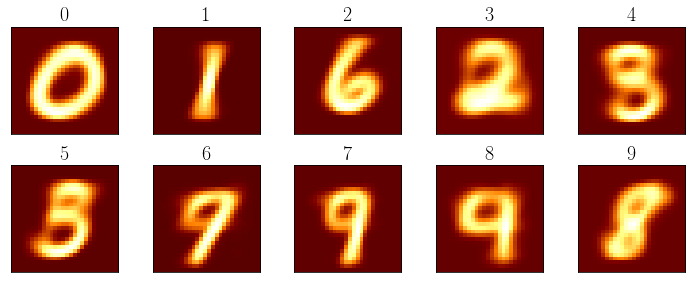

In [70]:
plot_templates(n_components)

<a id=em_algo_bern_K15></a>
#### K = 15<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [71]:
percentage = 1.0
n_components = 15
find_templates(digits, labels, n_components, percentage, 50)

(60000, 784) (60000,)
Found batch size = 13236 for memory limit = 512
	Full size = 2320, new full size = 511
n_iter = 0: likelihood = -12362470.044343535
n_iter = 1: likelihood = -12349338.377793344
n_iter = 2: likelihood = -10861866.4617661
n_iter = 3: likelihood = -9930194.047827417
n_iter = 4: likelihood = -9716768.124959655
n_iter = 5: likelihood = -9595078.759389991
n_iter = 6: likelihood = -9519063.960476305
n_iter = 7: likelihood = -9473423.350783529
n_iter = 8: likelihood = -9447395.226147912
n_iter = 9: likelihood = -9433956.099888671
n_iter = 10: likelihood = -9424298.992790109
n_iter = 11: likelihood = -9416177.35301208
n_iter = 12: likelihood = -9407917.454361714
n_iter = 13: likelihood = -9400272.402293477
n_iter = 14: likelihood = -9393841.226187348
n_iter = 15: likelihood = -9388125.41475595
n_iter = 16: likelihood = -9383088.919926248
n_iter = 17: likelihood = -9378524.073042514
n_iter = 18: likelihood = -9373652.083595168
n_iter = 19: likelihood = -9368486.769439707
n_

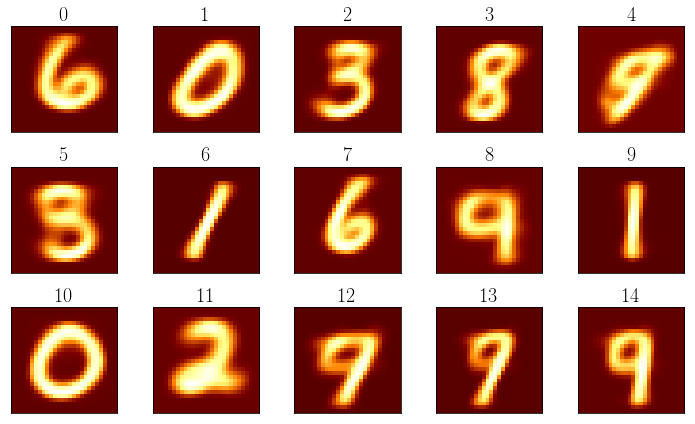

In [72]:
plot_templates(n_components)

<a id=em_algo_bern_K20></a>
#### K = 20<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [76]:
percentage = 1.0
n_components = 20
find_templates(digits, labels, n_components, percentage, batch_size=None, memory_limit=256, max_iter=50)

(60000, 784) (60000,)
Found batch size = 4964 for memory limit = 256
	Full size = 3094, new full size = 256
n_iter = 0: likelihood = -12362460.17330728
n_iter = 1: likelihood = -12347140.132116437
n_iter = 2: likelihood = -10719575.202231891
n_iter = 3: likelihood = -9613547.042925775
n_iter = 4: likelihood = -9407682.645567302
n_iter = 5: likelihood = -9312464.71234541
n_iter = 6: likelihood = -9243455.232068295
n_iter = 7: likelihood = -9189754.2229332
n_iter = 8: likelihood = -9151506.970772507
n_iter = 9: likelihood = -9126059.071594888
n_iter = 10: likelihood = -9108426.730824072
n_iter = 11: likelihood = -9095409.298733342
n_iter = 12: likelihood = -9084142.498431113
n_iter = 13: likelihood = -9074551.607649695
n_iter = 14: likelihood = -9067916.127862046
n_iter = 15: likelihood = -9063722.700290218
n_iter = 16: likelihood = -9060440.302835617
n_iter = 17: likelihood = -9058030.765441177
n_iter = 18: likelihood = -9055577.91776843
n_iter = 19: likelihood = -9053192.259673966
n_it

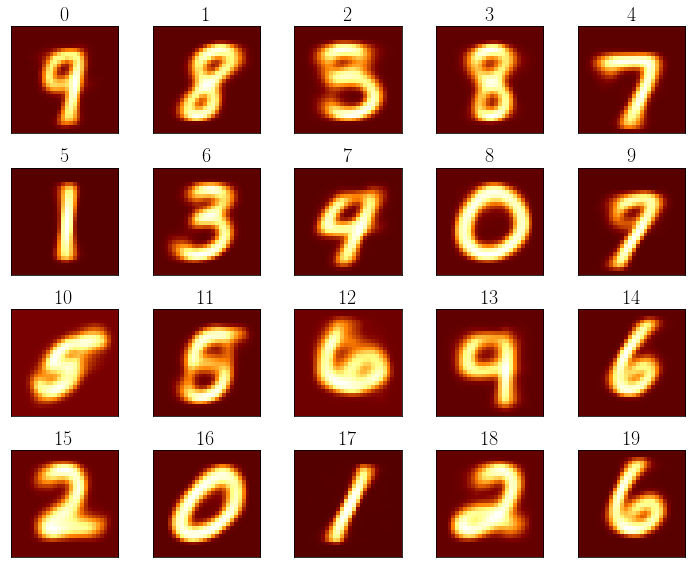

In [77]:
plot_templates(n_components)

In [ ]:
mapping = {0: 6, 1: 4, 2: 0, 3: 7, 4: 8,
           5: 3, 6: 1, 7: 6, 8: 2, 9: 3,
           10: 5, 11: 8, 12: 7, 13: 6, 14: 9,
           15: 4, 16: 1, 17: 2, 18: 0, 19: 5}
pred_labels = np.array([mapping[label] for label in np.argmax(gammas, axis=1)])
print('accuracy = ', np.mean(pred_labels == train_labels))

<a id=em_algo_bern_K25></a>
#### K = 25<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [86]:
percentage = 1.0
n_components = 25
find_templates(digits, labels, n_components, percentage=percentage, max_iter=50, memory_limit=256)

(60000, 784) (60000,)
Found batch size = 3971 for memory limit = 256
	Full size = 3868, new full size = 256
n_iter = 0: likelihood = -12362459.782563368
n_iter = 1: likelihood = -12343661.291240597
n_iter = 2: likelihood = -10689402.408746209
n_iter = 3: likelihood = -9429132.649461705
n_iter = 4: likelihood = -9192308.237384876
n_iter = 5: likelihood = -9075995.577067925
n_iter = 6: likelihood = -8962969.582063384
n_iter = 7: likelihood = -8884548.953861048
n_iter = 8: likelihood = -8848737.95160787
n_iter = 9: likelihood = -8827354.114384448
n_iter = 10: likelihood = -8813726.39147366
n_iter = 11: likelihood = -8805932.477591697
n_iter = 12: likelihood = -8801350.076566886
n_iter = 13: likelihood = -8798398.63293665
n_iter = 14: likelihood = -8796067.962745955
n_iter = 15: likelihood = -8794037.49844421
n_iter = 16: likelihood = -8792435.74302196
n_iter = 17: likelihood = -8790924.549050014
n_iter = 18: likelihood = -8789511.29327438
n_iter = 19: likelihood = -8788313.922538992
n_ite

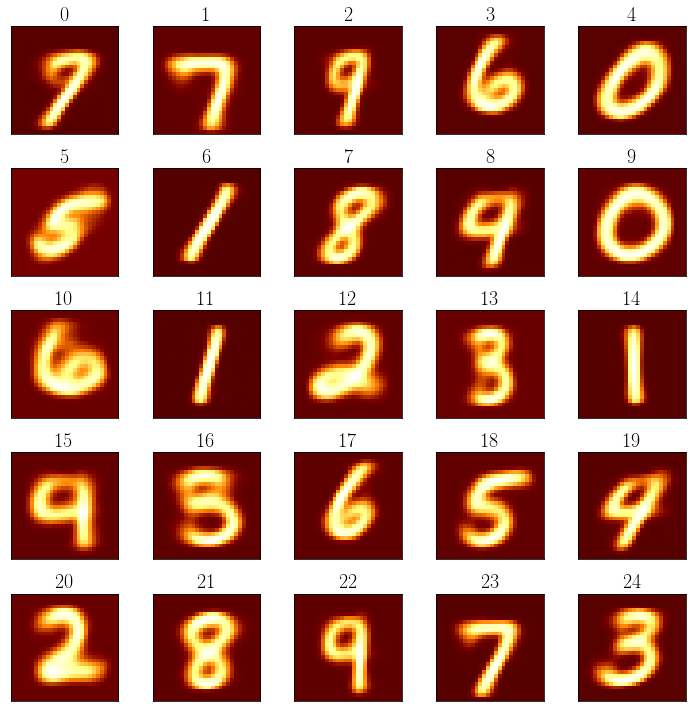

In [87]:
plot_templates(n_components)

In [99]:
print('K =', n_components)
gammas = pkl.load(open('K{}_gammas.pkl'.format(n_components), 'rb'))
candidates = [[9, 7], [7],    [9, 7], [6   ], [0],
              [3, 5], [1],    [8],    [4, 9], [0],
              [6],    [1],    [2],    [3, 8], [1],
              [4, 9], [3, 8], [6],    [5],    [4, 9],
              [2],    [8],    [4, 9], [7],    [3, 8]]
n_steps = 10
best_accuracy = 0
best_mapping = None
for values in tqdm(product(*candidates)):
    mapping = {label:digit for label, digit in enumerate(values)}
    pred_labels = np.array([mapping[label] for label in np.argmax(gammas, axis=1)])
    accuracy = np.mean(pred_labels == labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = copy.deepcopy(mapping)
        print('accuracy = ', accuracy)

K = 25
accuracy =  0.71285
accuracy =  0.718033333333
accuracy =  0.734
accuracy =  0.739183333333
accuracy =  0.749233333333
accuracy =  0.754416666667


<a id=em_algo_bern_K5_pd></a>
#### K = 5 per digit<sup>[toc](#toc)</sup> <sup>[head](#em_algo_bern)</sup>

In [10]:
n_components = 5
for digit in range(10):
    X = digits[labels == digit]
    print('digit = {}: n_samples = {}'.format(digit, X.shape[0]))
    em = EMBernoulli(n_components, max_iter=50, verbose=False)
    em(X)
    gammas = em.get_gammas()
    thetas = em.get_thetas()
    pkl.dump(thetas, open('K{}_D{}_thetas.pkl'.format(n_components, digit), 'wb'))
    pkl.dump(gammas, open('K{}_D{}_gammas.pkl'.format(n_components, digit), 'wb'))

digit = 0: n_samples = 5923


KeyboardInterrupt: 

In [8]:
n_components = 5
templates = []
for digit in range(10):
    templates.append(pkl.load(open('K{}_D{}_thetas.pkl'.format(n_components, digit), 'rb')))
templates = np.vstack(templates)
templates = np.maximum(templates, 1e-100)
templates = np.minimum(templates, 1 - 1e-100)
print(templates.shape)

(50, 784)


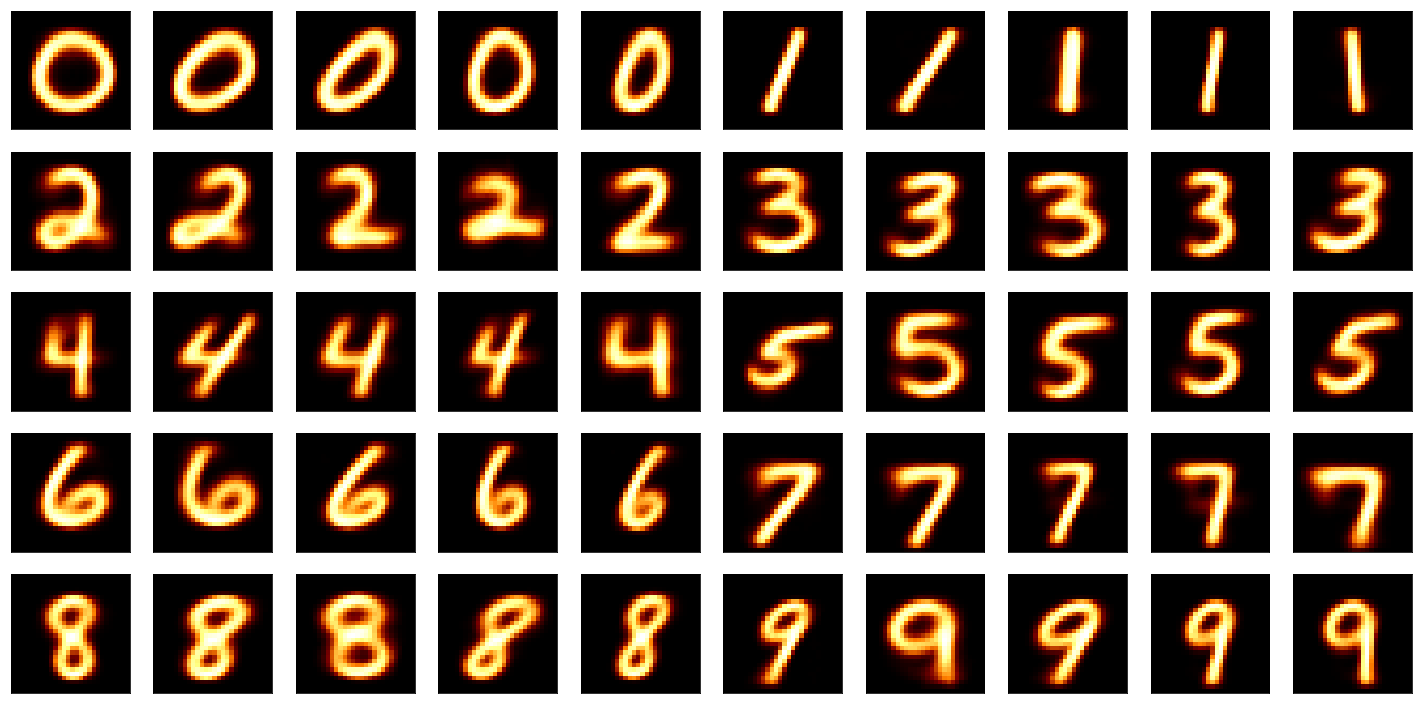

In [9]:
n_templates = 50
n_cols = 10
n_rows = int(1.0 * n_templates / n_cols + 0.5)
fsize = 2
f, axarr = plt.subplots(n_rows, n_cols, figsize=(n_cols * fsize, n_rows * fsize))
for n_label, (n_row, n_col) in enumerate(product(range(n_rows), range(n_cols))):
    axarr[n_row][n_col].imshow(templates[n_label].reshape((28, 28)), cmap='afmhot')
    axarr[n_row][n_col].set_xticks([])
    axarr[n_row][n_col].set_yticks([])
plt.tight_layout()

accuracy = 0.923
accuracy = 0.9165
accuracy = 0.9206666666666666
accuracy = 0.92375
accuracy = 0.9234
accuracy = 0.9231666666666667
accuracy = 0.9192857142857143
accuracy = 0.917875
accuracy = 0.9153333333333333
accuracy = 0.916
accuracy = 0.9167272727272727
accuracy = 0.91625
accuracy = 0.9156923076923077
accuracy = 0.9153571428571429
accuracy = 0.9148
accuracy = 0.91425
accuracy = 0.9145882352941177
accuracy = 0.914
accuracy = 0.9146842105263158
accuracy = 0.91545
accuracy = 0.9158571428571428
accuracy = 0.9165
accuracy = 0.9159130434782609
accuracy = 0.9163333333333333
accuracy = 0.9162
accuracy = 0.916
accuracy = 0.916
accuracy = 0.9157857142857143
accuracy = 0.9161379310344827
accuracy = 0.9158333333333334
accuracy = 0.9149354838709678
accuracy = 0.9145625
accuracy = 0.9143333333333333
accuracy = 0.9145
accuracy = 0.9145428571428571
accuracy = 0.9146666666666666
accuracy = 0.9143243243243243
accuracy = 0.9138157894736842
accuracy = 0.9143076923076923
accuracy = 0.914425
accuracy =

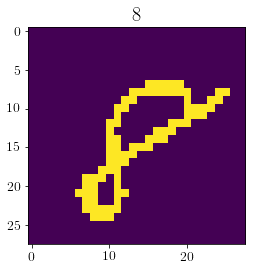

In [10]:
X = digits
y = labels

n_correct = 0
period = 1000
for n_sample in range(X.shape[0]):
    x = X[[n_sample], :]
    plt.imshow(x.reshape((28, 28)))
    plt.title('{}'.format(y[n_sample]))
    logs = np.sum(x * np.log(templates) + (1 - x) * np.log(1 - templates), axis=1)
    pred_y = np.argmax(logs) // n_components
    if pred_y == y[n_sample]:
        n_correct += 1
    if (n_sample + 1) % period == 0:
        print('accuracy =', n_correct / (n_sample + 1))
accuracy = n_correct / len(y)
print('accuracy = {}'.format(accuracy))

Для каких значений $K$ вам удалось выделить шаблоны всех цифр? Какие цифры оказались самыми сложными для распознавания и потребовали нескольких шаблонов?

Для одной из обученных моделей проведите следующее исследование. Вручную свяжите каждый шаблон с цифрой, которая на нем изображена. Затем, используя апостериорные распределения объектов тестовой выборки и привязку шаблонов к цифрам, определите цифру каждого тестового изображения и подсчитайте точность классификации. Согласуется ли правдоподобие обучающей и тестовой выборок с точностью классификации на тестовой выборке? 

<a id='em_topic_modelling'></a>
# Тематическое моделирование<sup>[toc](#toc)</sup>

![](http://imgur.com/S8WgwBp.png)

<a id='discussion_on_topic_modeling'></a>
### 3.1 Рассуждения на тему тематического моделирования<sup>[toc](#toc)</sup>

Тематическое моделирование является популярным инструментом анализа текстов. Задача заключается в поиске тем $T$, которые хорошо бы описывали документы $D$ со словарём $W$. Большинство тематических моделей оперирует данными в формате "мешка слов", т.е. учитывают только частоты слов в документах, а не их порядок. Одной из простейших тематических моделей является [PLSA](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis), которая приводит к задаче стохастического матричного разложения: 

$$F \approx \Phi \times \Theta$$
где
- $F_{W \times D}$— матрица распределений слов в документах (нормированные частоты)
- $\Phi_{W \times T}$ — матрица распределений слов в темах (модель)
- $\Theta_{T \times D}$ — матрица распределений тем в документах (результат применения модели к обучающим данным)

Можно сказать, что алгоритмы тематического моделирования производят мягкую бикластеризацию данных:
 - *мягкую*, так как объекты относятся не строго к одному кластеру, а к нескольким с разными вероятностями
 - *бикластеризацию*, так как модель одновременно кластеризует слова по темам и темы по документам.

#### 3.1.1 EM-алгоритм

![](http://imgur.com/EeIuI1T.png)

С вероятностной точки зрения, задача обучения модели PLSA ставится как максимизация неполного правдоподобия по параметам $\Phi$ и $\Theta$. ЕМ-алгоритм для модели PLSA заключается в повторении двух шагов:

- **Е-шаг** — оценка распределений тем для каждого слова в каждом документе по параметрам $\Phi$ и $\Theta$ (шаг 6);
- **М-шаг** — обновление параметров $\Phi$ и $\Theta$ на основе полученных оценок (шаги 7 и 9).

Существуют различные модификации итерационного процесса, позволяющие снизить расходы по памяти. В данном случае, мы избегаем хранения трехмерной матрицы $p_{tdw}$, сразу пересчитывая $\Theta$ для текущего документа и аккумулируя счетчики $n_{wt}$ для последующего пересчета $\Phi$.

Псевдокод алгритма записывается следующим образом:

1. Инициализировать $\phi_{wt}^0$ для всех $w \in W$, $t \in T$ и $\theta_{td}^0$ для всех $t \in T$, $d \in D$
2. Внешний цикл по итерациям $i = 1 ... max\_iter$:
3. $\quad$ $n_{wt}^i := 0$, $n_t^i := 0$ для всех $w \in W$ и $t \in T$ 
4. $\quad$ Внутренний цикл по документам $d \in D$  
5. $\qquad$ $Z_w := \sum_{t \in T} \phi_{wt}^{i-1}\theta_{td}^{i-1}$ для всех $w \in d$ $\cfrac{}{}$
6. $\qquad$ $p_{tdw} := \cfrac{ \phi_{wt}^{i-1}\theta_{td}^{i-1} }{ Z_w }$ (**E-шаг**)
7. $\qquad$ $\theta_{td}^{i} := \cfrac{ \sum_{w \in d} n_{dw} p_{tdw} }{ n_d }$ для всех $t \in T$ (**M-шаг**)
8. $\qquad$ Увеличить $n_{wt}^i$ и $n_t^i$ на $n_{dw} p_{tdw}$ для всех $w \in W$ и $t \in T$
9. $\quad \phi_{wt}^i := \cfrac{n_{wt}^i}{n_t^i}$ для всех $w \in W$ и $t \in T$ (**M-шаг**)

Обозначения:
 - $p_{tdw}$ — вероятность темы $t$ для слова $w$ в документе $d$
 - $\phi_{wt}$ — элемент матрицы $\Phi$, соответствующий вероятности слова $w$ в теме $t$
 - $\theta_{td}$ — элемент матрицы $\Theta$, соответствующий вероятности темы $t$ в документе $d$
 - $n_{wt}$ — элемент матрицы счётчиков отнесения слова $w$ к теме $t$ (путем нормирования этой матрицы получается матрица $\Phi$)
 - $Z_w$ — элемент вектора вспомогательных переменных, соответствующий слову $w$
 - $n_t$ — вектор нормировочных констант для матрицы $n_{wt}$
 - $n_d$ — вектор нормировочных констант для матрицы $n_{dw}$
 - $n$ — суммарное число слов в коллекции



#### 3.1.2  Оценка качества

Для оценивания качества построенной модели и контроля сходимости процесса обучения обычно используют [перплексию](http://www.machinelearning.ru/wiki/images/8/88/Voron-iip9-talk.pdf):

$$\mathcal{P} = \exp\bigg(- \frac{\mathcal{L}}{n} \bigg) = \exp\bigg(- \cfrac{1}{n}\sum_{d \in D}\sum_{w \in d} n_{dw} \ln \big(\sum_{t \in T}\phi_{wt}\theta_{td} \big)\bigg)$$

Это традиционная мера качества в тематическом моделировании, которая основана на правдоподобии модели $\mathcal{L}$. Число итераций $max\_iter$ в алгоритме обучения следует выбирать достаточным для того, чтобы перплексия перестала существенно убывать. Однако известно, что перплексия плохо отражает интерпретируемость найденных тем, поэтому помимо нее обычно используются дополнительные меры или экспертные оценки.

Загрузите [коллекцию писем Х. Клинтон](https://www.dropbox.com/s/je8vq5fsb8xpy2u/hillary_data.zip?dl=0). 

Извлеките полные тексты писем из файла *Emails.csv* и подготовьте данные в формате "мешка слов" с помощью функции  [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) пакета sklearn. Рекомендуется произвести фильтрацию слов по частотности для удаления слишком редких и стоп-слов (рекомендованный нижний порог в пределах 10 и верхний 400-600).

In [179]:
emails_path = './hillary_data/output/Emails.csv'
raw_data = pd.read_csv(emails_path)
emails = list(raw_data['RawText'])
vectorizer = CountVectorizer(min_df=10, max_df=500, stop_words='english')
DW = vectorizer.fit_transform(emails)

word2index = dict(vectorizer.vocabulary_)
index2word = {i:w for w,i in word2index.items()}
print('Document-word matrix size = {}'.format(DW.shape))
print('Dictionary size = {}'.format(len(word2index)))

Document-word matrix size = (7945, 9991)
Dictionary size = 9991


In [180]:
print('Number of empty documents:', np.sum(np.sum(DW, axis=1) == 0))
print('Number of never occuring terms:', np.sum(np.sum(DW, axis=0) == 0))

Number of empty documents: 53
Number of never occuring terms: 0


Как оказывается, есть такие тексты, векторное представление которых содержит только нули. Эти тексты нужно убрать, так как по существу они бессмысленны.

In [181]:
print(DW.shape)
n_terms = DW.sum(axis=1).A1.flatten()
if np.any(n_terms == 0):
    DW = DW[np.flatnonzero(n_terms != 0)]
print(DW.shape)

(7945, 9991)
(7892, 9991)


In [182]:
print('Number of empty documents:', np.sum(np.sum(DW, axis=1) == 0))
print('Number of never occuring terms:', np.sum(np.sum(DW, axis=0) == 0))

Number of empty documents: 0
Number of never occuring terms: 0


<a id='plsa_and_application'></a>
### 3.2 Реализация ЕМ-алгоритма для модели PLSA и его применение<sup>[toc](#toc)</sup>

In [240]:
class PLSA(Checker):
    def __init__(self, n_topics, init='rand', max_iter=10, verbose=0, seed=0,
                 eps=1e-30, check_errors=False, max_error=1e-10,
                 memory_limit=2048):
        super().__init__(max_error)
        self._n_topics = n_topics
        self._init = init
        self._seed = seed
        self._max_iter = max_iter
        self.verbose = verbose
        self._check_errors = check_errors
        self._eps = eps
        self._class_name = type(self).__name__
        self._memory_limit = memory_limit
        self._n_runs = 0
        
    def set_max_iter(self, max_iter):
        self._check_int(max_iter, 'max_iter')
        self._check_positive(max_iter, 'max_iter')
        self._max_iter = max_iter
        
    def __call__(self, DW, copy=False, continued=False):
        """
        Аргументы:
            :param DW - матрица документ-термин
            :type DW  - scipy.sparse.csr_matrix размера [n_documents, n_terms]
        """
        if continued:
            self._check_continuation(DW, continued)
        else:
            self._set_DW(DW, copy)
            self._initialize_phi_theta()
            self._initialize_params()
            self._determine_method()
        self._printers[3](self._make_msg('initialized'))
        output = self._method()
        self._n_runs += 1
        self._initial_iter = self._n_iter
        return output

    def _iterative(self):
        for n_iter in range(self._initial_iter, self._initial_iter + self._max_iter):
            self._n_iter = n_iter
            self.H_wt = np.zeros_like(self.Phi)                               # [W x T] +
            self._log_perplexity = 0
            for n_doc in range(self._n_docs):
                P_dwt = np.multiply(self.Phi, self.Theta[:, n_doc][None, :])  # [W x T] +
                P_dw  = np.maximum(np.sum(P_dwt, axis=1)[:, None], self._eps) # [W, 1]  +
                N_dw  = self.DW[n_doc].toarray().T                            # [W, 1]  +
                self._log_perplexity -= np.sum(N_dw * np.log(P_dw)) / self._n
                H_dwt = P_dwt / P_dw                                          # [W x T] +
                H_dwt = np.multiply(N_dw, H_dwt)                              # [W x T]
                self.H_wt += H_dwt                                            # [W x T]
                self.Theta[:, n_doc] = np.sum(H_dwt, axis=0) / self._n_d[n_doc]
                if self._check_errors:
                    self._check_distr(self.Theta[:, n_doc], 'Theta[:, {}]'.format(n_doc))
            self.Phi = self.H_wt / np.sum(self.H_wt, axis=0)[None, :]    # [W x T]
            if self._check_errors:
                for n_topic in range(self._n_topics):
                    self._check_dsitr(self.Phi[:, n_topic], 'Phi[:, {}]'.format(n_topic))
                self._printers[6]('n_iter = {}: errors checking activated: no errors')
            self._log_perplexities.append(self._log_perplexity)
            self._printers[1]('n_iter = {}: log_P = {}'.format(self._n_iter, self._log_perplexity))
        return self.Phi, self.Theta, self._log_perplexities
    
    def _direct(self):
        self.WD = self.DW.toarray().T             # [W x D] +
        self.Theta = self.Theta.T
        for n_iter in range(self._initial_iter, self._initial_iter + self._max_iter):
            self._n_iter = n_iter
            H_wdt = self.Phi.reshape((self._voc_size, 1, self._n_topics)) * \
                    self.Theta.reshape((1, self._n_docs, self._n_topics))  # [W x D x T] +
            H_wdt = np.maximum(H_wdt, self._eps)
            P_wd = np.sum(H_wdt, axis=2)           # [W x D] +
            self._log_perplexity = -np.sum(self.WD * np.log(P_wd)) / self._n
            H_wdt = H_wdt / P_wd[:, :, None]       # [W x D x T]
            H_wdt = self.WD[:, :, None] * H_wdt    # [W x D x T]
            self.Theta = H_wdt.sum(axis=0) / self._n_d[:, None]
            self.Phi = H_wdt.sum(axis=1)           # [W x T]
            self.Phi = self.Phi / self.Phi.sum(axis=0)[None, :]
            self._printers[1]('n_iter = {}: log_P = {}'.format(self._n_iter, self._log_perplexity))
        self.Theta = self.Theta.T
        return self.Phi, self.Theta, self._log_perplexities
            
    def _check_continuation(self, DW, continued):
        assert isinstance(DW, scipy.sparse.csr_matrix) 
        if continued:
            # Проверка того, что уже запускали
            assert self._n_runs > 0
            # Проверка того, что размер переданной матрицы совпадает с ранее исопользованными
            assert self._n_docs, self._voc_size == DW.shape

    def _set_DW(self, DW, copy):
        assert isinstance(DW, scipy.sparse.csr_matrix)
        if copy:
            self.DW = copy.deepcopy(DW)
        else:
            self.DW = DW
        self._n_d = self.DW.sum(axis=1).A1
        self._n   = np.sum(self._n_d)
        self._n_docs, self._voc_size = self.DW.shape

    def _initialize_params(self):
        self._log_perplexities = []
        self._n_iter = 0
        self._initial_iter = 0
        
    def _initialize_phi_theta(self):
        if self._init == 'rand':
            np.random.seed(self._seed)
            self.Phi = np.maximum(np.random.rand(self._voc_size, self._n_topics), self._eps)
            self.Theta = np.maximum(np.random.rand(self._n_topics, self._n_docs), self._eps)
            self.Phi = self.Phi / np.sum(self.Phi, axis=0)[None, :]
            self.Theta = self.Theta / np.sum(self.Theta, axis=0)[None, :]
        elif self._init == 'uniform':
            self.Phi = np.full((self._voc_size, self._n_topics), 1.0 / self._voc_size)
            self.Theta = np.full((self._n_topics, self._n_docs), 1.0 / self._n_topics)
        else:
            raise ValueError(self._make_msg('Unknown value of init', method_name))        
        
    def _determine_method(self):
        nbytes = self.DW.dtype.type(0).nbytes
        required_memory_direct = (self._n_topics * self._n_docs +     # self.Theta
                                  self._voc_size * self._n_topics +   # self.Phi
                                  self._voc_size * self._n_docs * self._n_topics + # H_wdt
                                  self._voc_size * self._n_docs) * nbytes * 1.0  # P_wd
        required_memory_iter   = (self._n_topics * self._n_docs +     # self.Theta
                                  self._voc_size * self._n_topics +   # self.Phi
                                  self._voc_size * self._n_topics +   # H_wt
                                  self._voc_size * self._n_topics +   # P_dwt
                                  self._voc_size * self._n_topics +   # H_dwt
                                  self._voc_size * 2) * nbytes * 1.0 # N_dw, P_dw
        required_memory_direct /= 2 ** 20
        required_memory_iter /= 2 ** 20
        self._printers[5]('Required memory direct = {} Mb'.format(required_memory_direct))
        self._printers[5]('Required memory iter   = {} Mb'.format(required_memory_iter))
        self._printers[5]('Memory limit   = {} Mb'.format(self._memory_limit))
        if required_memory_direct > self._memory_limit:
            self._printers[5]('Choosing iterative solving method')
            self._method = self._iterative
        else:
            self._printers[5]('Choosing direct sovling method')
            self._method = self._direct
        
    def _make_msg(self, msg, method_name=None):
        if method_name is None:
            return '{}:{}'.format(self._class_name, msg)
        return '{}:{}:{}'.format(self._class_name, method_name, msg)

<a id='plsa_task1'></a>
### 3.2.1 Задание 1 [3 балла]<sup>[toc](#toc)</sup>
Примените ваш алгоритм к подготовленным данным, рассмотрите число тем T = 5. Постройте график значения перплексии в зависимости от итерации (убедитесь в корректности реализации: график перплексии должен быть невозрастающим). Выведите для каждой темы топ-20 наиболее вероятных слов.

#### 3.2.1.1  Применение алгоритма к подготовленным данным для числа тем T = 5. Построение графика зависимости значения перплексии в зависимости от итерации.

In [243]:
plsa = PLSA(n_topics=5, init='rand', max_iter=100, verbose=11, seed=11)
Phi, Theta, log_perplexities = plsa(DW)

Required memory direct = 3610.101676940918 Mb
Required memory iter   = 1.9780120849609375 Mb
Memory limit   = 2048 Mb
Choosing iterative solving method
PLSA:initialized
n_iter = 0: log_P = 9.262380724230798
n_iter = 1: log_P = 8.44798081144236
n_iter = 2: log_P = 8.436970928480326
n_iter = 3: log_P = 8.425530238260036
n_iter = 4: log_P = 8.411369044642637
n_iter = 5: log_P = 8.392842349644422
n_iter = 6: log_P = 8.369010107745389
n_iter = 7: log_P = 8.340134612958895
n_iter = 8: log_P = 8.307929176682991
n_iter = 9: log_P = 8.275183431857142
n_iter = 10: log_P = 8.244706760539955
n_iter = 11: log_P = 8.21800825530144
n_iter = 12: log_P = 8.194787510912521
n_iter = 13: log_P = 8.174547428741906
n_iter = 14: log_P = 8.15711872569037
n_iter = 15: log_P = 8.142296033898436
n_iter = 16: log_P = 8.129681844506655
n_iter = 17: log_P = 8.118776142091447
n_iter = 18: log_P = 8.109168711014942
n_iter = 19: log_P = 8.100603264019421
n_iter = 20: log_P = 8.092905548851375
n_iter = 21: log_P = 8.08

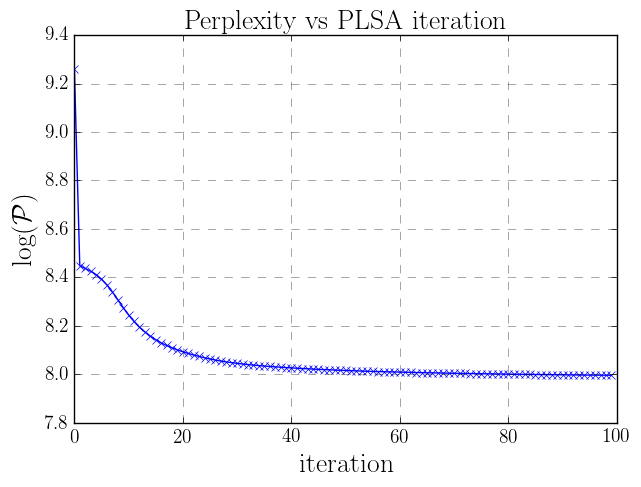

In [247]:
plt.figure(figsize=(7, 5))
plt.plot(log_perplexities, marker='x', color='b', zorder=2)
plt.grid(linestyle='--', alpha=0.5)
plt.title('Perplexity vs PLSA iteration');
plt.xlabel('iteration');
plt.ylabel('$\log(\mathcal{P})$');

#### 3.2.1.2 Вывод 20 наиболее вероятных слов для каждой темы.

In [245]:
def get_max_indices(values, n_max):
    values = [[i, x] for i, x in enumerate(values)]
    values = sorted(values, key=lambda x: -x[1])
    indices = [i for i, x in values[:n_max]]
    return np.array(indices)

def get_representatives(Phi, n_max):
    representatives = pd.DataFrame()
    for topic in range(Phi.shape[1]):
        words = [index2word[i] for i in get_max_indices(Phi[:, topic], max_words)]
        representatives[topic] = words
    return representatives

In [246]:
max_words = 20
representatives = get_representatives(Phi, max_words)
print(representatives)

              0            1            2           3          4
0         haiti           mr       israel    benghazi       lona
1   development        party       lauren   sensitive    valmoro
2        global         iran      israeli        dept        jan
3         women  afghanistan       jiloty    produced   valmorou
4      pakistan        white       update      select      draft
5         china     election          ses      waiver        feb
6           aid          war         room        comm        cdm
7     diplomacy   republican           en        foia       anne
8         human     campaign  palestinian  redactions      thank
9    assistance      percent    netanyahu       04841         b1
10       health    americans        verma       libya     gordon
11       rights       afghan        calls          al       deal
12       africa      america       arrive        2012      marie
13     economic  republicans        route      libyan        dec
14         food       sen

<a id='plsa_task2'></a>
### 3.2.2 Задание 2 [0.5 балла]<sup>[toc](#toc)</sup>
Рассмотрите число тем T = 10, 20. Сравните между собой топ-20 наиболее вероятных слов в каждой теме (а также для модели, полученной ранее). Можно ли сказать, что конкретность каждой темы изменяется с ростом их числа?

#### 3.2.2.1 Применение алгоритма для числа тем T = 10. Вывод топ-20 наиболее вероятных слов для каждой темы.

#### 3.2.2.2 Применение алгоритма для числа тем T = 20. Вывод топ-20 наиболее вероятных слов для каждой темы.

В целом, с ростом числа тем растет интерпретируемость полученных результатов, т.е. растет все большему числу тем можно поставить в соответствие некую метку. Например, найденным выше группам топ-20 наиболее вероятных слов можно присвоить следующие метки: "политика", "дипломатия", "военные действия", "безопасность", "Персидский Залив", "гуманитарная помощь", "проживаение и путешествие" (тема 6 для T = 20) и т.п.

<a id='plsa_task3'></a>
### 3.2.3 Задание 3 [0.5 балла]<sup>[toc](#toc)</sup>
Протестируйте модель для разных начальных приближений. Что можно сказать об устойчивости алгоритма (идентичны ли топовые слова в соответствующих темах моделей)?

Ниже модель запускается для 4-х различных значений "зерна" генератора случайных чисел. Число тем равно 10, а число итераций выбрано равным 40. Во всех случаях топовые слова в темах совпали. Таким образом, можно утверждать, что алгоритм PLSA достаточно устойчив к выбору начальных приближений.

<a id='lda_and_visualization'></a>
### 3.3 Модель LDA и визуализация<sup>[toc](#toc)</sup>

Модель [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) является наиболее популярной тематической моделью. Единственное отличие от модели PLSA заключается в введении априорных распределений Дирихле на столбцы матриц $\Phi$ и $\Theta$, которое может способствовать дополнительному сглаживанию или разреживанию параметров.

В этом задании предлагается воспользоваться реализацией модели [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html), обучение которой основано на вариационном байесовском выводе. Для выполнения задания вам потребуется установить пакеты [gensim](https://radimrehurek.com/gensim/install.html) и [pyldavis 2.0](https://pyldavis.readthedocs.io/en/latest/readme.html#installation).

Подготовьте данные в формате, подходящем для *gensim* (полное API gensim можно найти [здесь](https://radimrehurek.com/gensim/apiref.html)). Пример обработки вывода *CountVectorizer* для gensim можно найти [здесь](https://gist.github.com/aronwc/8248457).

<a id='lda_task1'></a>
### 3.3.1 Задание 1 [1 балла]<sup>[toc](#toc)</sup>

Примените [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) к подготовленным данным (рекомендуется задать заведомо большое число итераций в параметре *passes*, например, 30). Визуально сравните полученные темы по топ-20 наиболее вероятным словам с темами, полученными вашей реализацией ЕМ-алгоритма. У какой из моделей получились более интерпретируемые темы?

In [5]:
from gensim import matutils
from gensim.models.ldamodel import LdaModel

emails_path = './hillary_data/output/Emails.csv'
raw_data = pd.read_csv(emails_path)
emails = list(raw_data['RawText'])
vectorizer = CountVectorizer(min_df=10, max_df=500, stop_words='english')
DW = vectorizer.fit_transform(emails)

word2index = dict(vectorizer.vocabulary_)
index2word = {i:w for w,i in word2index.items()}
print('Document-word matrix size = {}'.format(DW.shape))
print('Dictionary size = {}'.format(len(word2index)))
num_topics = 10
passes = 40

corpus = matutils.Sparse2Corpus(DW.tocoo().transpose().tocsc())
lda = LdaModel(corpus, num_topics=num_topics, passes=passes, id2word=index2word)

Document-word matrix size = (7945, 9991)
Dictionary size = 9991


In [12]:
def get_lda_representatives(lda, index2word, n):
    representatives = pd.DataFrame()
    topics = lda.show_topics(num_topics=-1, num_words=n, formatted=False)
    for ti, topic in topics:
        words = [w for w, p in topic]
        representatives[ti] = words
    return representatives

max_words = 20
representatives = get_lda_representatives(lda, index2word, max_words)
print(representatives)

            0           1          2            3            4            5  \
0        lona    benghazi     lauren       thomas       health        haiti   
1     valmoro   sensitive     jiloty        verma       senate     pakistan   
2    valmorou        dept        feb         mail         care          ses   
3      gordon    produced         b1       letter   republican  afghanistan   
4        deal      select     update       senate        women       afghan   
5         sid      waiver      draft        craig        white           ap   
6     ireland        comm      thank        blair  republicans      reuters   
7         dup        foia   philippe      senator        party      embassy   
8    northern  redactions       list          dec      percent      haitian   
9      turkey       04841      lissa         reid     campaign       police   
10         uk       libya      calls      vermarr    democrats     children   
11      shaun        2012        cdm       mexico   

В целом, оба алгоритма PLSA и LDA выделяют одни и те же темы. Стоит отметить, что какие-то темы лучше выделены в результате применения PLSA, в то время как другие - в результате применения LDA. Однако существенных различий не наблюдается, что может быть связано с достаточно большим размером коллекции текстов.

<a id='lda_task2'></a>
### 3.3.2 Задание  2 [1 балл]<sup>[toc](#toc)</sup>
Визуализируйте модель из gensim с помощью ldavis (описание API LDAvis для работы с gensim есть [здесь](http://pyldavis.readthedocs.io/en/latest/modules/API.html)), пример — [здесь](https://github.com/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb).

In [39]:
topic_term_matrix = lda.get_topics()
print(topic_term_matrix.shape)

doc_topic_matrix = np.zeros((DW.shape[0], num_topics))
for n_doc in tqdm(range(DW.shape[0])):
    dw = DW[n_doc]
    bow = []
    for n_row in dw.nonzero()[1]:
        bow.append((n_row, dw[0, n_row]))
    doc_topic_list = lda.get_document_topics(bow)
    for topic, prob in doc_topic_list:
        doc_topic_matrix[n_doc, topic] = prob
print(doc_topic_matrix.shape)

100%|██████████| 7945/7945 [00:23<00:00, 343.67it/s]

(7945, 10)


In [59]:
model_data = {}
doc_topic_matrix /= np.sum(doc_topic_matrix, axis=1)[:, None]
model_data['topic_term_dists'] = topic_term_matrix
model_data['doc_topic_dists'] = doc_topic_matrix
model_data['doc_lengths'] = DW.sum(axis=1).A1.flatten()
model_data['term_frequency'] = DW.sum(axis=0).A1.flatten()
model_data['vocab'] = [index2word[i] for i in range(DW.shape[1])]

In [60]:
import pyLDAvis
vis_data = pyLDAvis.prepare(**model_data)

In [61]:
pyLDAvis.display(vis_data)

In [63]:
vis_data = pyLDAvis.prepare(mds='tsne', **model_data)
pyLDAvis.display(vis_data)

In [64]:
pyLDAvis.prepare(mds='mmds', **model_data)
pyLDAvis.display(vis_data)

In [68]:
import gensim
import pyLDAvis.gensim
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, index2word)
vis_data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

### Рекомендации к выполнению
Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim, который можно получить следующей командой

    dictionary = gensim.corpora.Dictionary.from_corpus(corpora, vocab_dict)

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы CountVectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.